# 0. IMPORT LIBRARIES

In [2]:
import sys
sys.path.insert(0,r"C:\THAIQUANGTHINH\Anaconda3\Anaconda3\Lib\site-packages")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 120)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
appl = pd.read_csv('application_data.csv')
previous = pd.read_csv('previous_application.csv')

In [4]:
appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
appl.shape

(307511, 122)

In [6]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans      1730.43         17145.00   
1     2802425      108129         Cash loans     25188.62        607500.00   
2     2523466      122040         Cash loans     15060.74        112500.00   
3     2819243      176158         Cash loans     47041.33        450000.00   
4     1784265      202054         Cash loans     31924.40        337500.00   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    17145.00              0.00         17145.00                   SATURDAY   
1   679671.00               NaN        607500.00                   THURSDAY   
2   136444.50               NaN        112500.00                    TUESDAY   
3   470790.00               NaN        450000.00                     MONDAY   
4   404055.00               NaN        337500.00                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1               0.00                   0.18   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                      0.87                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        12.00           middle  POS mobile with interest           365243.00   
1        36.00       low_action          Cash X-Sell: low           365243.00   
2        12.00             high         Cash X-Sell: high           365243.00   
3        12.00           middle       Cash X-Sell: middle           365243.00   
4        24.00             high         Cash Street: high                 NaN   

   D

In [8]:
previous.shape

(1670214, 37)

In [9]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# 1. DATA UNDERSTANDING AND CLEANING

## 1.1. Check duplicate in application dataset

In [10]:
# APPLICATION dataset: Check dup row
appl.isnull().sum()
null_count=round(100*(appl.isnull().sum()/len(appl.index)),2)
null_count=null_count[null_count>=40]
null_count
len(null_count)

49

We can see that there are 41 columns having the highest missing percentage (>=40%) So here we remove those columns. Then we need to delete these missing columns.

In [11]:
cols_dropped=([null_count[null_count >=50.00].index])
appl.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [12]:
appl.shape
100*(appl.isnull().sum()/len(appl.index))

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
Length: 81, dtype: float64

In [13]:
appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In this step, because in the original application.csv, there are lots of redundant columsn for analyzing. I present the step of finding the high IV variables by using the optbinning to filter which variables need to be considered

In [14]:
from optbinning import OptimalBinning,BinningProcess

def ft_auto_binning(data_, numeric_vars, char_vars):
    """
    Perform automatic binning on numeric and categorical variables.

    Args:
        data_ (pandas.DataFrame): The input dataset.
        numeric_vars (list): List of column names for numeric variables.
        char_vars (list): List of column names for categorical variables.

    Returns:
        tuple: A tuple containing the binning process object, information value (IV) dataframe, and binning table dataframe.
    """

    # Initialize variables
    l = []
    l_binning_table = dict()

    # Create a BinningProcess object
    binning_process = BinningProcess(variable_names=numeric_vars + char_vars, categorical_variables=char_vars, max_n_bins=5, split_digits=4)

    # Fit the binning process to the data
    binning_process.fit(data_, data_['TARGET'])

    # Iterate over each variable in the dataset
    for var in data_.columns:
        # Get the binned variable
        optb = binning_process.get_binned_variable(var)
        optb_table = optb.binning_table.build()

        # Filter out bins with no events
        optb_table = optb_table[optb_table['Event'] > 0]

        # Store the binning table for the variable
        l_binning_table[var] = optb_table

        # Append variable information to the list
        l.append([
            var,
            optb_table.loc['Totals', 'IV'],
            optb_table.shape[0] - 1,
            optb_table.loc[optb_table.drop('Totals')['Count'].idxmax(), 'Bin'],
            optb_table.drop('Totals')['Count'].max()
        ])

    # Create a dataframe for information value (IV)
    iv = pd.DataFrame(l, columns=['variable', 'iv', 'unique_bin', 'top_bin', 'freq_bin'])

    # Concatenate the binning tables into a single dataframe
    df_binning_table = pd.concat(l_binning_table, axis=0)

    # Return the binning process, IV dataframe, and binning table dataframe
    return binning_process, iv, df_binning_table

(CVXPY) May 27 08:58:07 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 27 08:58:07 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [15]:
appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [16]:
def get_categorical_and_numerical_columns(dataframe):
    """
    Returns the list of categorical and numerical columns in the given dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe.

    Returns:
    numeric_columns (list): List of numerical column names.
    categorical_columns (list): List of categorical column names.
    """
    numeric_columns = dataframe.select_dtypes(include='number').columns.tolist()
    categorical_columns = dataframe.select_dtypes(include='object').columns.tolist()

    return numeric_columns, categorical_columns

numeric_df, char_df = get_categorical_and_numerical_columns(appl)

binning_process, iv, df_binning_table = ft_auto_binning(appl, numeric_df, char_df)
numeric_df = appl.select_dtypes(include='number').columns.tolist()
char_df = appl.select_dtypes(include='object').columns.tolist()

binning_process, iv, df_binning_table=ft_auto_binning(appl,numeric_df, char_df )

In [17]:

def save_data_to_csv():
    """
    Saves the dataframes iv and df_binning_table to CSV files.

    Parameters:
    None

    Returns:
    None
    """
    iv.to_csv(r"iv.csv")
    df_binning_table.to_csv(r'df_binning_table.csv')
save_data_to_csv()

In [18]:
def ft_select_corr_iv(data, var_list, iv_df):
    """
    Selects variables based on correlation and information value (iv).

    Args:
        data (pandas.DataFrame): The input data containing the variables.
        var_list (list): The list of variables to consider for selection.
        iv_df (pandas.DataFrame): The dataframe containing the information value (iv) for each variable.

    Returns:
        tuple: A tuple containing two lists - the selected variables and the removed variables.

    """
    # Calculate the correlation matrix
    corr = data[var_list].corr().reset_index()
    
    # Initialize a list to store the variables to be removed
    remove_vars = []
    
    # Iterate over each column in the correlation matrix
    for col in corr[var_list]:
        # Iterate over each row in the column
        for i in range(1, len(corr[col])):
            var_i = corr["index"][i]
            
            # Check if the absolute correlation value is greater than 0.7 and the variables are not the same
            if (abs(corr[col][i]) > 0.7) and var_i != col:
                # Get the information value (iv) for the variables
                iv_var_i = iv_df.loc[iv_df["variable"] == var_i, "iv"].item()
                iv_var_col = iv_df.loc[iv_df["variable"] == col, "iv"].item()
                
                # Determine which variable to remove based on the information value (iv)
                if iv_var_col < iv_var_i:
                    remove = col
                else:
                    remove = var_i
                
                # Add the variable to the list of removed variables if it's not already present
                remove_vars.append(remove) if remove not in remove_vars else remove_vars
    
    # Select the variables that are not in the list of removed variables and have an iv greater than 0.03
    select_var = list(set(var_list) - set(remove_vars))
    select_var = list(iv_df[(iv_df['variable'].isin(select_var)) & (iv_df['iv'] > 0.03)]['variable'])
    
    return select_var, remove_vars
select_var,remove_vars = ft_select_corr_iv(appl, numeric_df, iv )

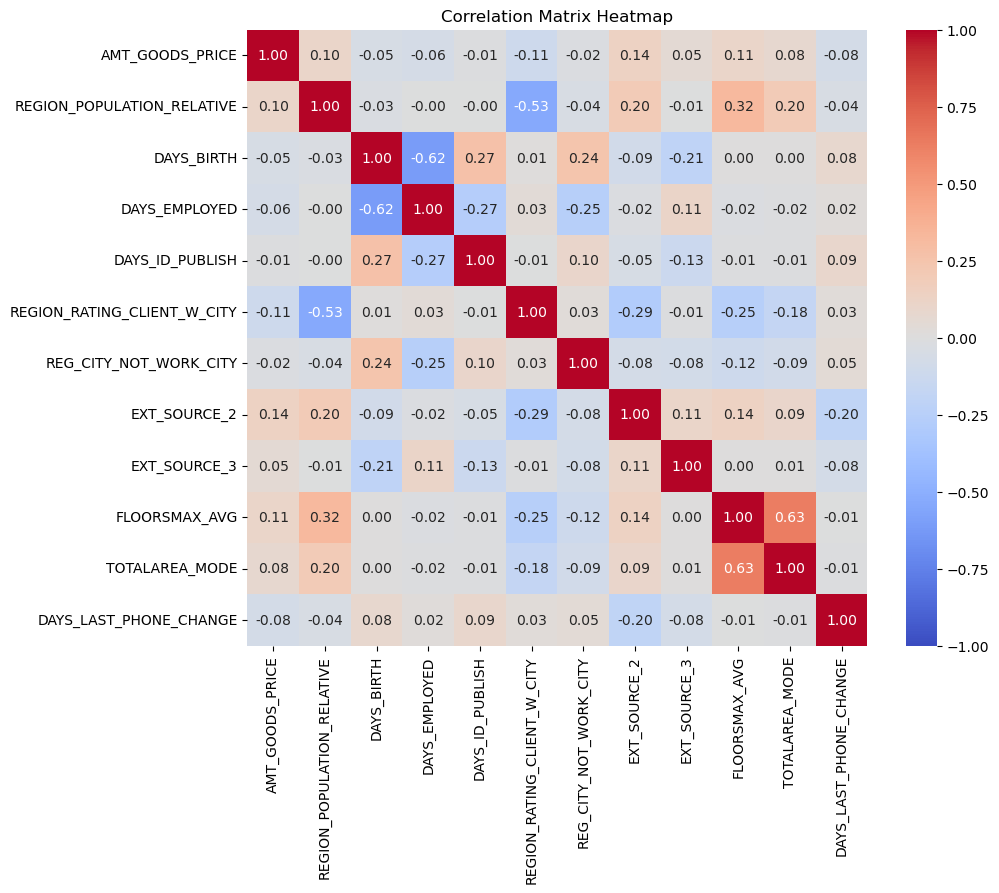

In [19]:
# Calculate the correlation matrix
corr = appl[select_var].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
def get_categorical_columns_iv(dataframe):
    """
    Returns a list of categorical columns based on the information value (IV) threshold.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe.

    Returns:
    list: A list of categorical columns with IV greater than 0.04.
    """

    categorical_columns_iv = dataframe[iv[iv['iv'] > 0.04]['variable']].select_dtypes(include='object').columns.tolist()
    return categorical_columns_iv

# Example usage
categorical_columns_iv = get_categorical_columns_iv(appl)
print(categorical_columns_iv)


['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [21]:
import sqlite3
appl = pd.read_csv('application_data.csv')
previous = pd.read_csv('previous_application.csv')
print(previous.shape)
previous.isnull().sum()
null_count=round(100*(previous.isnull().sum()/len(previous.index)),2)
null_count=null_count[null_count>=40]
null_count
cols_dropped=([null_count[null_count >=50.00].index])
previous.drop(labels=cols_dropped[0],axis=1,inplace=True)

(1670214, 37)


In [22]:
import sqlite3

def save_data_to_database():
    """
    Saves selected columns from two dataframes to an in-memory SQLite database.
    
    This function connects to an in-memory SQLite database and saves selected columns from two dataframes,
    'previous' and 'appl', to separate tables in the database. The selected columns are specified by the
    variables 'categorical_columns_iv', 'select_var', 'TARGET', and 'SK_ID_CURR'.
    
    Parameters:
        None
        
    Returns:
        None
    """
    conn = sqlite3.connect(':memory:')
    selected_columns = categorical_columns_iv + select_var + ['TARGET'] + ['SK_ID_CURR']
    
    # Save 'previous' dataframe to 'previous' table in the database
    previous.to_sql('previous', conn, index=False, if_exists='replace')
    
    # Save selected columns from 'appl' dataframe to 'filtered_appl_IV' table in the database
    appl[selected_columns].to_sql('filtered_appl_IV', conn, index=False, if_exists='replace')
save_data_to_database()

In [26]:
def fetch_data_from_database(conn):
	"""
	Fetches data from the database using the provided connection object.

	Args:
		conn (connection): The database connection object.

	Returns:
		DataFrame: The result of the SQL query as a pandas DataFrame.
	"""
	query = """
	WITH CTE1 AS
	(SELECT A.*, B.SK_ID_PREV, B.NAME_CONTRACT_TYPE, B.AMT_ANNUITY,
					B.AMT_APPLICATION, B.AMT_CREDIT, B.AMT_GOODS_PRICE,
					B.WEEKDAY_APPR_PROCESS_START, B.HOUR_APPR_PROCESS_START,
					B.FLAG_LAST_APPL_PER_CONTRACT, B.NFLAG_LAST_APPL_IN_DAY,
					B.NAME_CASH_LOAN_PURPOSE, B.NAME_CONTRACT_STATUS, B.DAYS_DECISION,
					B.NAME_PAYMENT_TYPE, B.CODE_REJECT_REASON, B.NAME_TYPE_SUITE,
					B.NAME_CLIENT_TYPE, B.NAME_GOODS_CATEGORY, B.NAME_PORTFOLIO,
					B.NAME_PRODUCT_TYPE, B.CHANNEL_TYPE, B.SELLERPLACE_AREA,
					B.NAME_SELLER_INDUSTRY, B.CNT_PAYMENT, B.NAME_YIELD_GROUP,
					B.PRODUCT_COMBINATION, B.DAYS_FIRST_DRAWING, B.DAYS_FIRST_DUE,
					B.DAYS_LAST_DUE_1ST_VERSION, B.DAYS_LAST_DUE, B.DAYS_TERMINATION,
					B.NFLAG_INSURED_ON_APPROVAL
		FROM filtered_appl_IV A
		LEFT JOIN PREVIOUS B
			ON A.SK_ID_CURR = B. SK_ID_CURR), 
	cte2 as(
	SELECT SK_ID_CURR,
			 SUM(CASE
			WHEN NAME_CONTRACT_STATUS = 'Approved' THEN 1
			ELSE 0 
		END) AS TOTAL_APPROVED, COUNT(*) AS TOTAL_REQUEST,
			 AVG(DAYS_DECISION) AS AVG_DAYS_DECISION,
			 AVG(CNT_PAYMENT) AS AVG_CNT_PAYMENT,
			 SUM(DAYS_FIRST_DUE) AS SUM_DAYS_FIRST_DUE,
			 AVG(DAYS_FIRST_DUE) AS AVG_DAYS_FIRST_DUE,
			 SUM(DAYS_LAST_DUE_1ST_VERSION) AS SUM_DAYS_LAST_DUE_1ST_VERSION,
			 AVG(DAYS_LAST_DUE_1ST_VERSION) AS AVG_DAYS_LAST_DUE_1ST_VERSION,
			 AVG(DAYS_LAST_DUE) AS AVG_DAYS_LAST_DUE,
			 SUM(DAYS_LAST_DUE) AS SUM_DAYS_LAST_DUE,
			 AVG(DAYS_TERMINATION) AS AVG_DAYS_TERMINATION,
			 SUM(DAYS_TERMINATION) AS SUM_DAYS_TERMINATION,
			 AVG(AMT_APPLICATION) AS AVG_AMT_APPLICATION,
			 AVG(AMT_CREDIT) AS AVG_AMT_CREDIT, AVG(AMT_GOODS_PRICE) AS AMT_GOODS_PRICE,
			 AVG(AMT_ANNUITY) AS AVG_AMT_ANNUITY
	FROM CTE1
    group by SK_ID_CURR)
select A.*, b.NAME_INCOME_TYPE  , b.NAME_EDUCATION_TYPE  , b.OCCUPATION_TYPE  , b.ORGANIZATION_TYPE  , b.AMT_GOODS_PRICE  , 
b.REGION_POPULATION_RELATIVE  , b.DAYS_BIRTH  , b.DAYS_EMPLOYED  , b.DAYS_ID_PUBLISH  , b.REGION_RATING_CLIENT_W_CITY  , b.REG_CITY_NOT_WORK_CITY  , 
b.EXT_SOURCE_2  , b.EXT_SOURCE_3  , b.FLOORSMAX_AVG  , b.TOTALAREA_MODE  , b.DAYS_LAST_PHONE_CHANGE  , b.TARGET  from cte2 A
left join filtered_appl_IV b
on a.SK_ID_CURR = b.SK_ID_CURR
"""
result = pd.read_sql_query(query, conn)


In [ ]:
result= pd.read_csv(r'result.csv')
numeric_df = result.select_dtypes(include='number').columns.tolist()
char_df = result.select_dtypes(include='object').columns.tolist()

binning_process, iv, df_binning_table=ft_auto_binning(result,numeric_df, char_df )

iv.to_csv(r"iv_1.csv")
df_binning_table.to_csv(r'df_binning_table_1.csv')

In [ ]:
def ft_select_corr_iv (data, var_list, iv_df):
    corr = data[var_list].corr().reset_index()
    remove_vars = []
    for col in corr[var_list]:
        for i in range(1,len(corr[col])):
            var_i = corr["index"][i]
            if (abs(corr[col][i]) > 0.7) and var_i != col :
                iv_var_i = iv_df.loc[iv_df["variable"]==var_i, "iv"].item()
                iv_var_col = iv_df.loc[iv_df["variable"]==col, "iv"].item()
                if iv_var_col < iv_var_i:
                    remove = col
                else:
                    remove = var_i
                remove_vars.append(remove) if remove not in remove_vars else remove_vars
                
    select_var = list(set(var_list) -set(remove_vars))
    select_var = list(iv_df[(iv_df['variable'].isin(select_var)) & (iv_df['iv'] >0.03)]['variable'])
    return select_var,remove_vars
select_var,remove_vars = ft_select_corr_iv(result, numeric_df, iv )

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature AVG_DAYS_DECISION: 0.05350702901684818------
----------------------------------------------------------------------------------------------------
------The percentile for the feature AVG_DAYS_DECISION------
The 0th percentile value of AVG_DAYS_DECISION is -2922.0
The 25th percentile value of AVG_DAYS_DECISION is -1247.0
The 50th percentile value of AVG_DAYS_DECISION is -789.0
The 75th percentile value of AVG_DAYS_DECISION is -466.8
The 90th percentile value of AVG_DAYS_DECISION is -298.0
The 92th percentile value of AVG_DAYS_DECISION is -273.8706666666665
The 94th percentile value of AVG_DAYS_DECISION is -247.25
The 96th percentile value of AVG_DAYS_DECISION is -214.33333333333331
The 98th percentile value of AVG_DAYS_DECISION is -171.0
The 100th percentile value of AVG_DAYS_DECISION is -2.0
------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


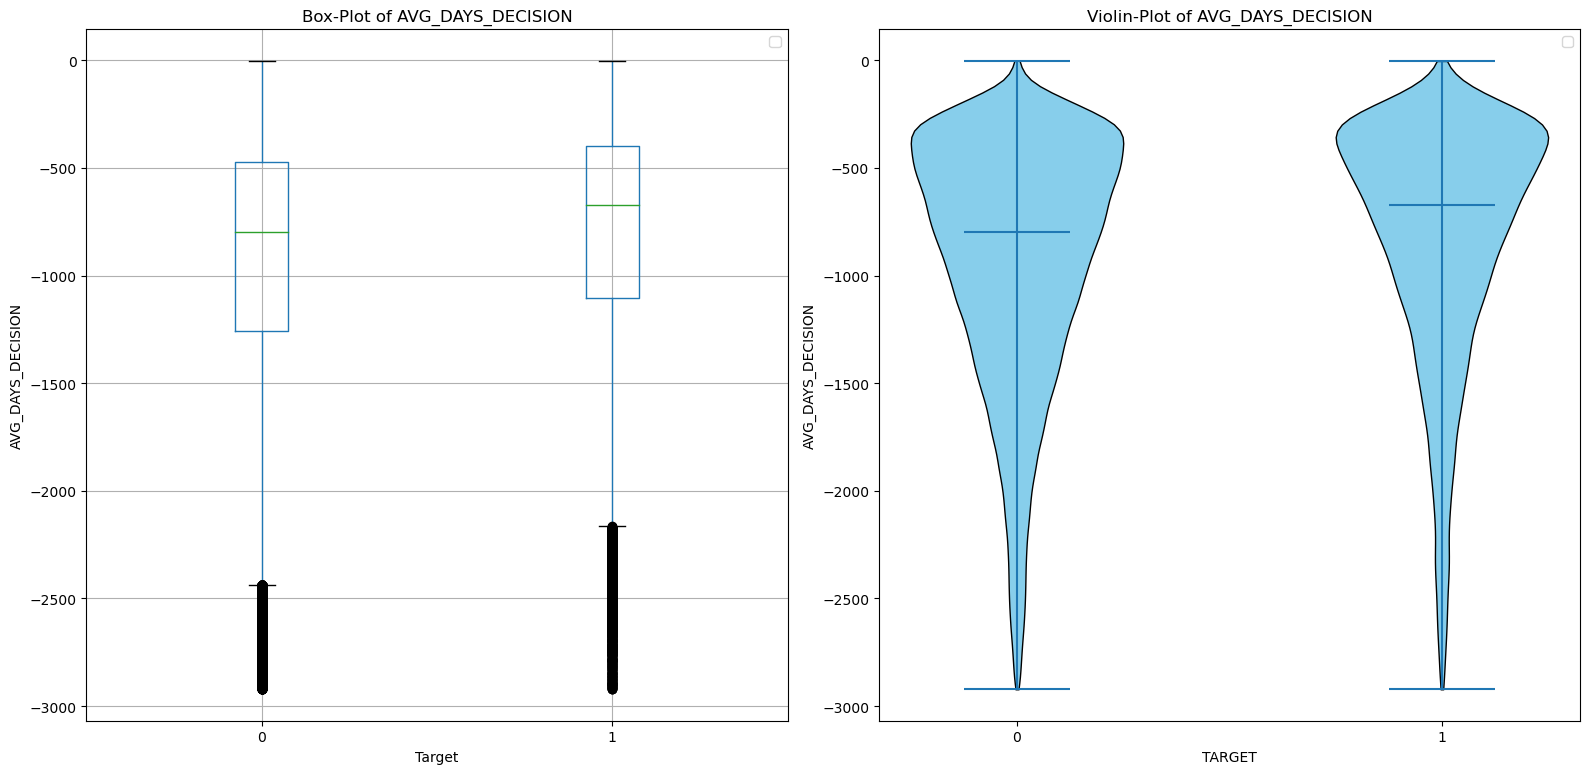

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature SUM_DAYS_FIRST_DUE: 0.057724764317374014------
----------------------------------------------------------------------------------------------------
------The percentile for the feature SUM_DAYS_FIRST_DUE------
The 0th percentile value of SUM_DAYS_FIRST_DUE is -42423.0
The 25th percentile value of SUM_DAYS_FIRST_DUE is -3942.0
The 50th percentile value of SUM_DAYS_FIRST_DUE is -1840.0
The 75th percentile value of SUM_DAYS_FIRST_DUE is -545.0
The 90th percentile value of SUM_DAYS_FIRST_DUE is 358272.30000000005
The 92th percentile value of SUM_DAYS_FIRST_DUE is 360999.28
The 94th percentile value of SUM_DAYS_FIRST_DUE is 362509.0
The 96th percentile value of SUM_DAYS_FIRST_DUE is 363647.0
The 98th percentile value of SUM_DAYS_FIRST_DUE is 364650.0
The 100th percentile value of SUM_DAYS_FIRST_DUE is 1459730.0
---------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


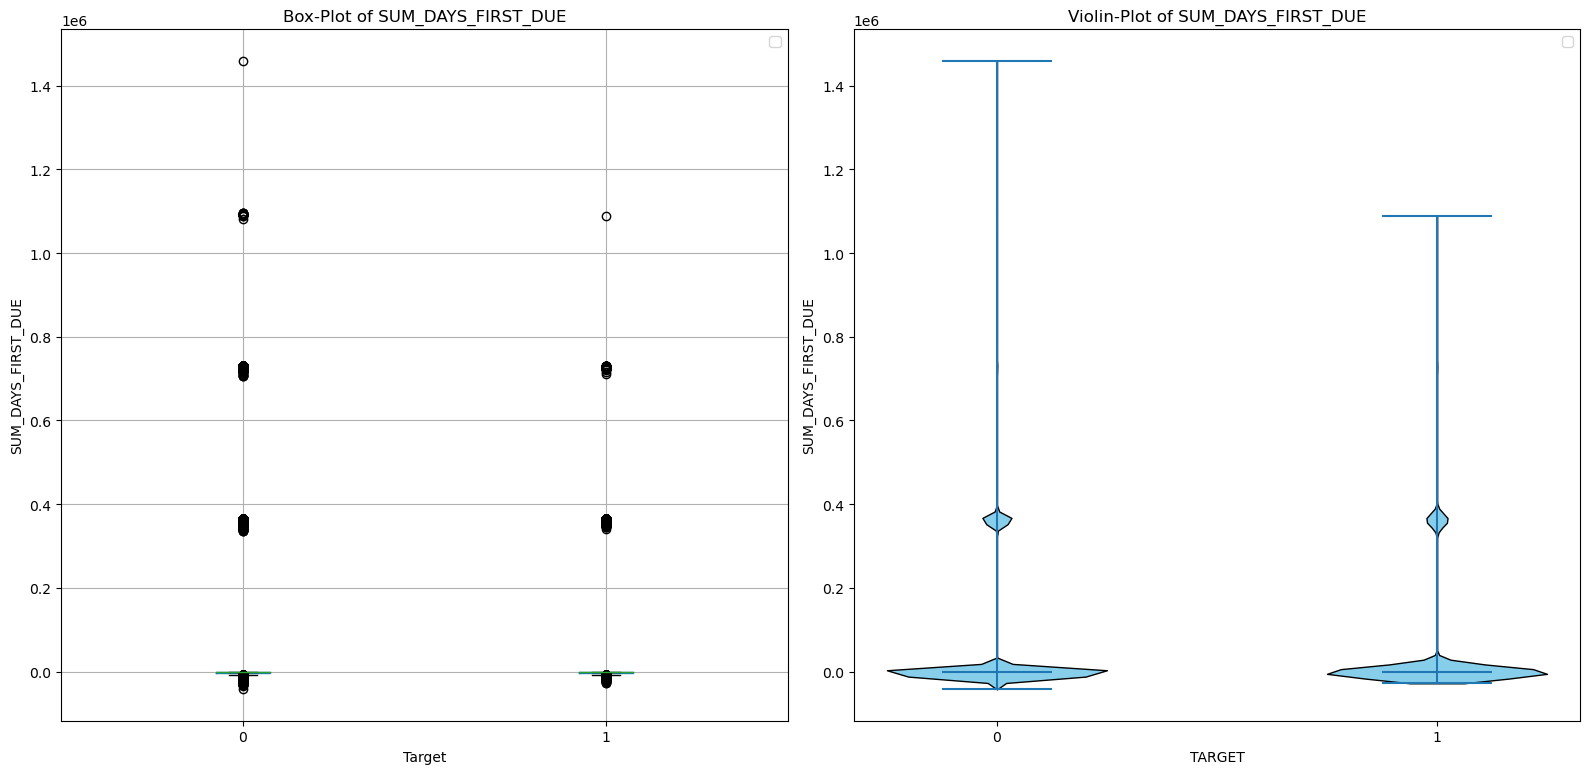

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature SUM_DAYS_LAST_DUE_1ST_VERSION: 0.057724764317374014------
----------------------------------------------------------------------------------------------------
------The percentile for the feature SUM_DAYS_LAST_DUE_1ST_VERSION------
The 0th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is -35733.0
The 25th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is -1922.0
The 50th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is -322.0
The 75th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is 359434.0
The 90th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is 364530.0
The 92th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is 364889.0
The 94th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is 365147.0
The 96th percentile value of SUM_DAYS_LAST_DUE_1ST_VERSION is 365263.0
The 98th percentile value of SUM_DAYS_LAST_DUE_1S

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


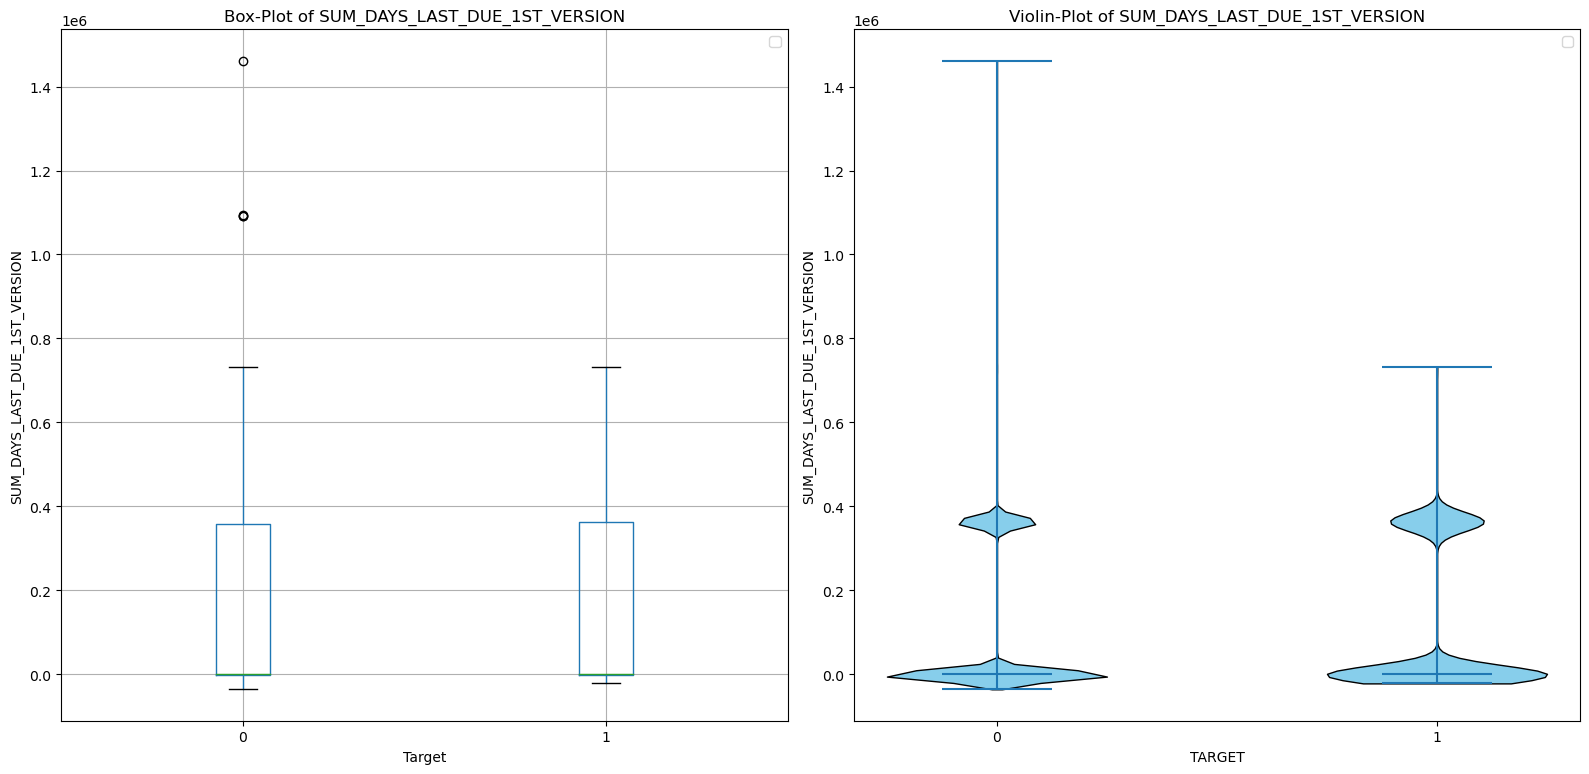

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature REGION_POPULATION_RELATIVE: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature REGION_POPULATION_RELATIVE------
The 0th percentile value of REGION_POPULATION_RELATIVE is 0.00029
The 25th percentile value of REGION_POPULATION_RELATIVE is 0.010006
The 50th percentile value of REGION_POPULATION_RELATIVE is 0.01885
The 75th percentile value of REGION_POPULATION_RELATIVE is 0.028663
The 90th percentile value of REGION_POPULATION_RELATIVE is 0.035792
The 92th percentile value of REGION_POPULATION_RELATIVE is 0.035792
The 94th percentile value of REGION_POPULATION_RELATIVE is 0.04622
The 96th percentile value of REGION_POPULATION_RELATIVE is 0.04622
The 98th percentile value of REGION_POPULATION_RELATIVE is 0.072508
The 100th percentile value of

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


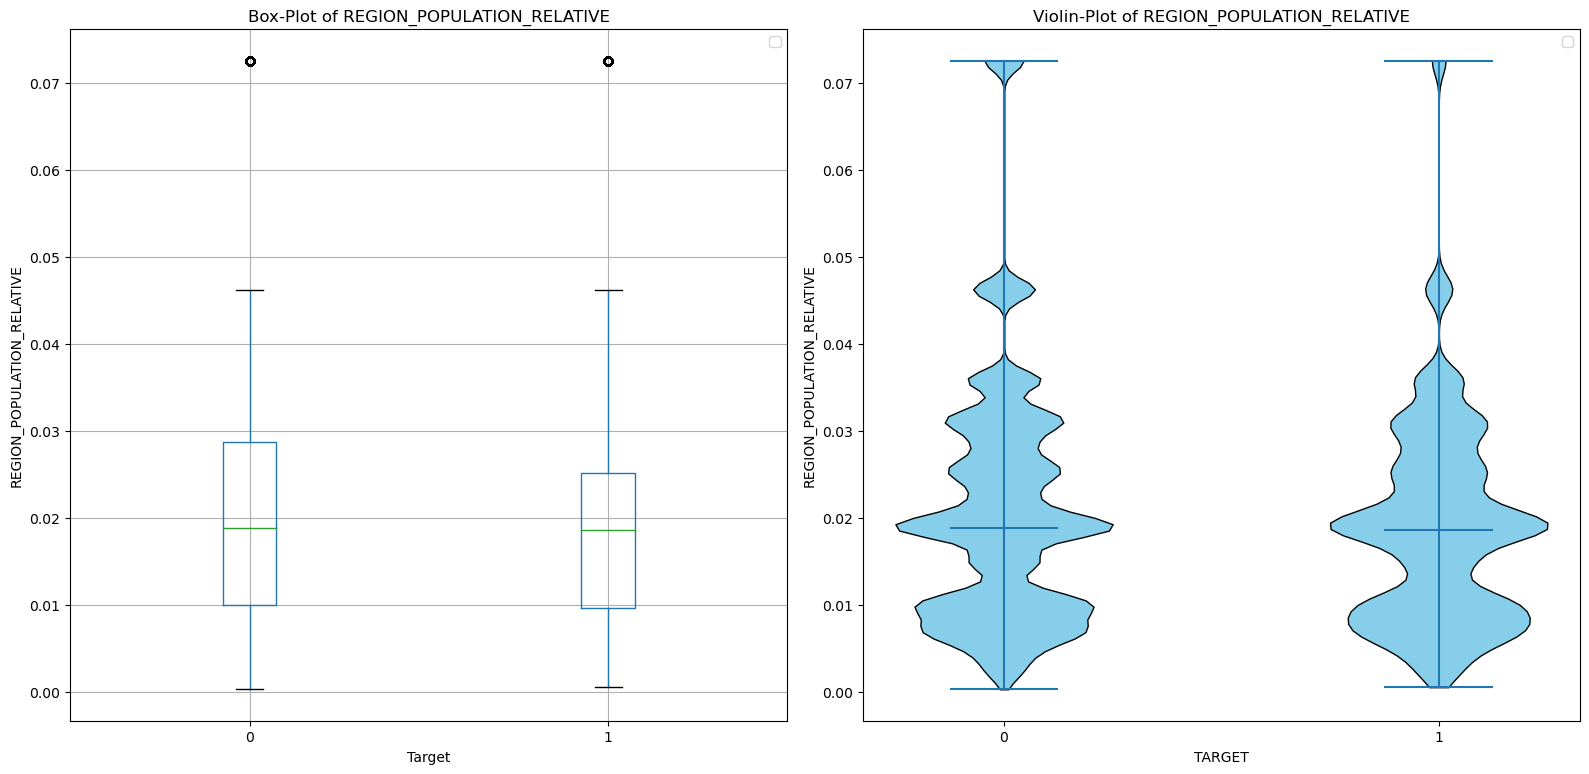

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature DAYS_BIRTH: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature DAYS_BIRTH------
The 0th percentile value of DAYS_BIRTH is -25229.0
The 25th percentile value of DAYS_BIRTH is -19682.0
The 50th percentile value of DAYS_BIRTH is -15750.0
The 75th percentile value of DAYS_BIRTH is -12413.0
The 90th percentile value of DAYS_BIRTH is -10284.0
The 92th percentile value of DAYS_BIRTH is -10021.0
The 94th percentile value of DAYS_BIRTH is -9664.0
The 96th percentile value of DAYS_BIRTH is -9138.400000000023
The 98th percentile value of DAYS_BIRTH is -8563.0
The 100th percentile value of DAYS_BIRTH is -7489.0
----------------------------------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


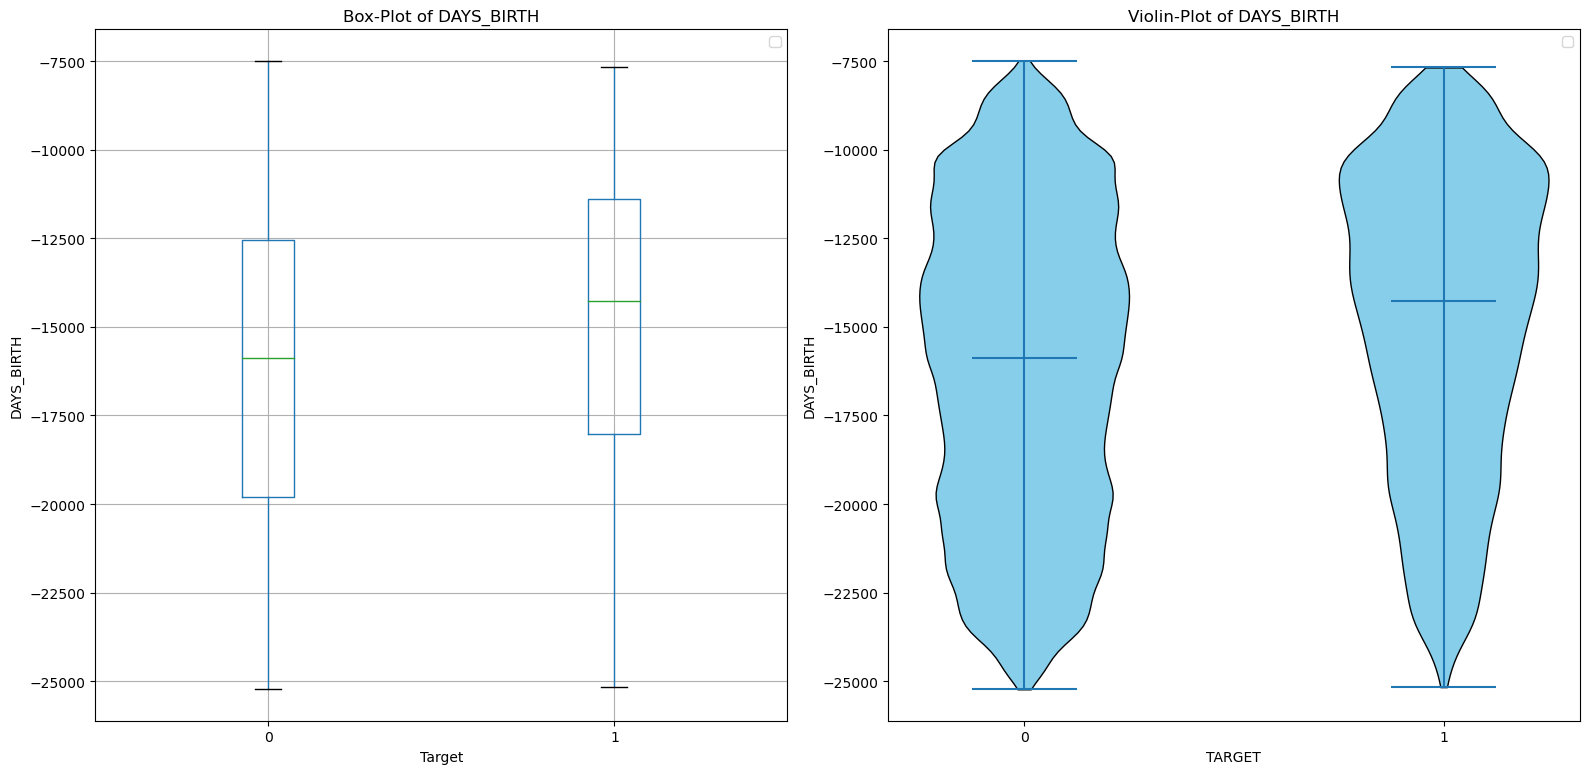

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature DAYS_EMPLOYED: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature DAYS_EMPLOYED------
The 0th percentile value of DAYS_EMPLOYED is -17912.0
The 25th percentile value of DAYS_EMPLOYED is -2760.0
The 50th percentile value of DAYS_EMPLOYED is -1213.0
The 75th percentile value of DAYS_EMPLOYED is -289.0
The 90th percentile value of DAYS_EMPLOYED is 365243.0
The 92th percentile value of DAYS_EMPLOYED is 365243.0
The 94th percentile value of DAYS_EMPLOYED is 365243.0
The 96th percentile value of DAYS_EMPLOYED is 365243.0
The 98th percentile value of DAYS_EMPLOYED is 365243.0
The 100th percentile value of DAYS_EMPLOYED is 365243.0
----------------------------------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


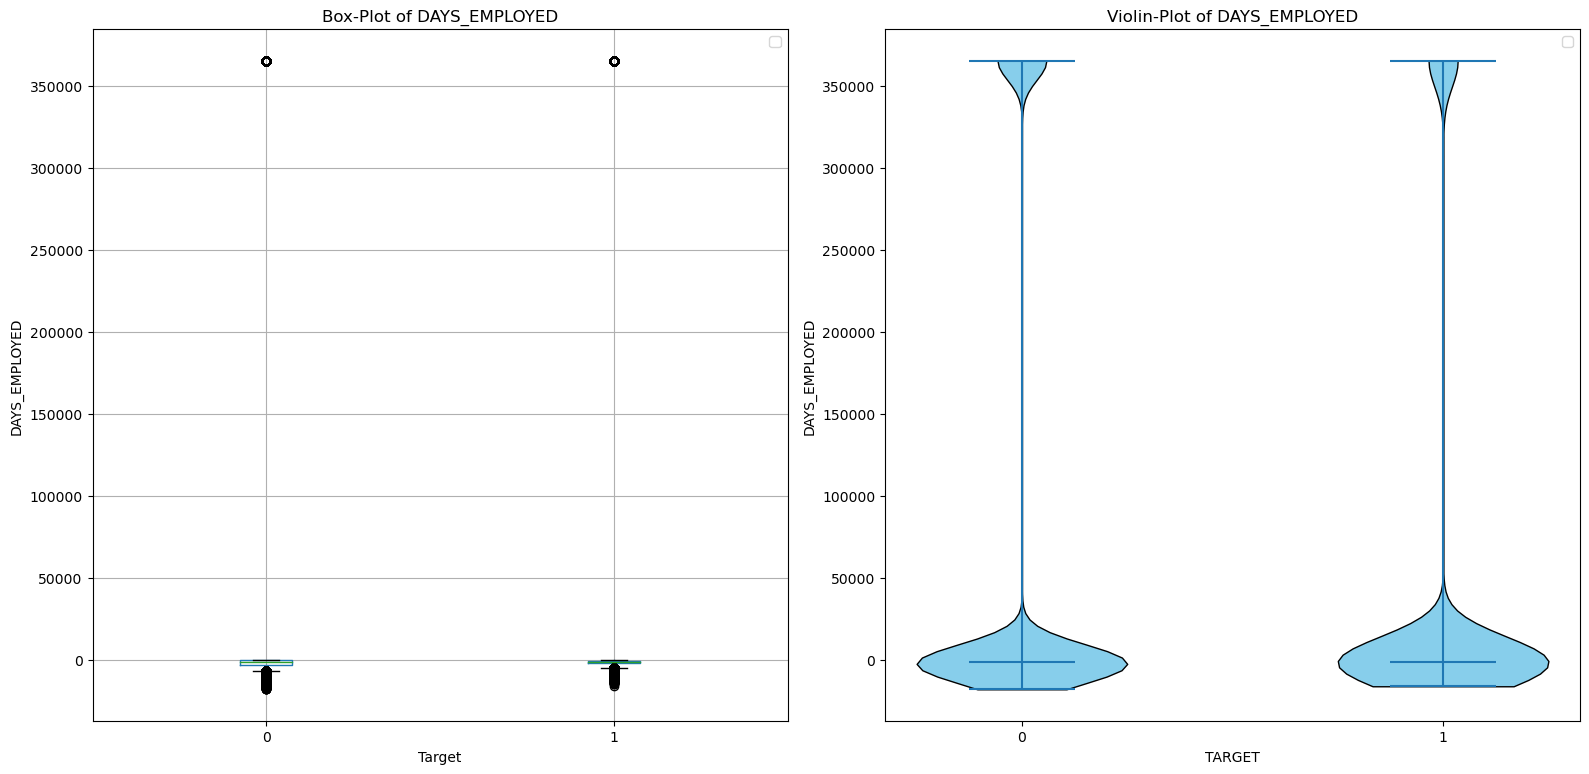

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature DAYS_ID_PUBLISH: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature DAYS_ID_PUBLISH------
The 0th percentile value of DAYS_ID_PUBLISH is -7197.0
The 25th percentile value of DAYS_ID_PUBLISH is -4299.0
The 50th percentile value of DAYS_ID_PUBLISH is -3254.0
The 75th percentile value of DAYS_ID_PUBLISH is -1720.0
The 90th percentile value of DAYS_ID_PUBLISH is -730.0
The 92th percentile value of DAYS_ID_PUBLISH is -586.0
The 94th percentile value of DAYS_ID_PUBLISH is -443.0
The 96th percentile value of DAYS_ID_PUBLISH is -300.0
The 98th percentile value of DAYS_ID_PUBLISH is -139.0
The 100th percentile value of DAYS_ID_PUBLISH is 0.0
----------------------------------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


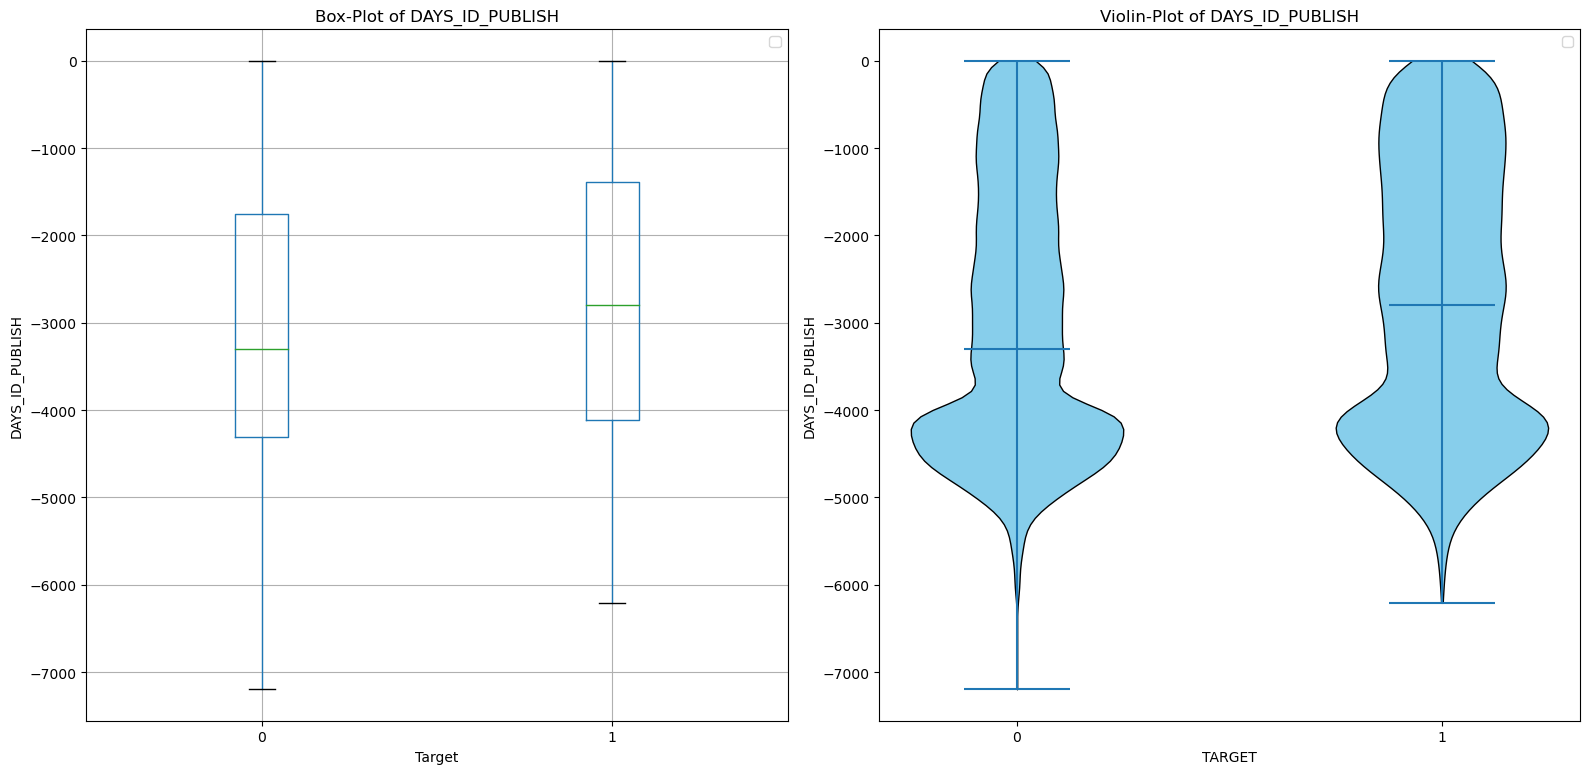

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature REGION_RATING_CLIENT_W_CITY: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature REGION_RATING_CLIENT_W_CITY------
The 0th percentile value of REGION_RATING_CLIENT_W_CITY is 1.0
The 25th percentile value of REGION_RATING_CLIENT_W_CITY is 2.0
The 50th percentile value of REGION_RATING_CLIENT_W_CITY is 2.0
The 75th percentile value of REGION_RATING_CLIENT_W_CITY is 2.0
The 90th percentile value of REGION_RATING_CLIENT_W_CITY is 3.0
The 92th percentile value of REGION_RATING_CLIENT_W_CITY is 3.0
The 94th percentile value of REGION_RATING_CLIENT_W_CITY is 3.0
The 96th percentile value of REGION_RATING_CLIENT_W_CITY is 3.0
The 98th percentile value of REGION_RATING_CLIENT_W_CITY is 3.0
The 100th percentile value of REGION_RATING_CLIENT_W_CITY i

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


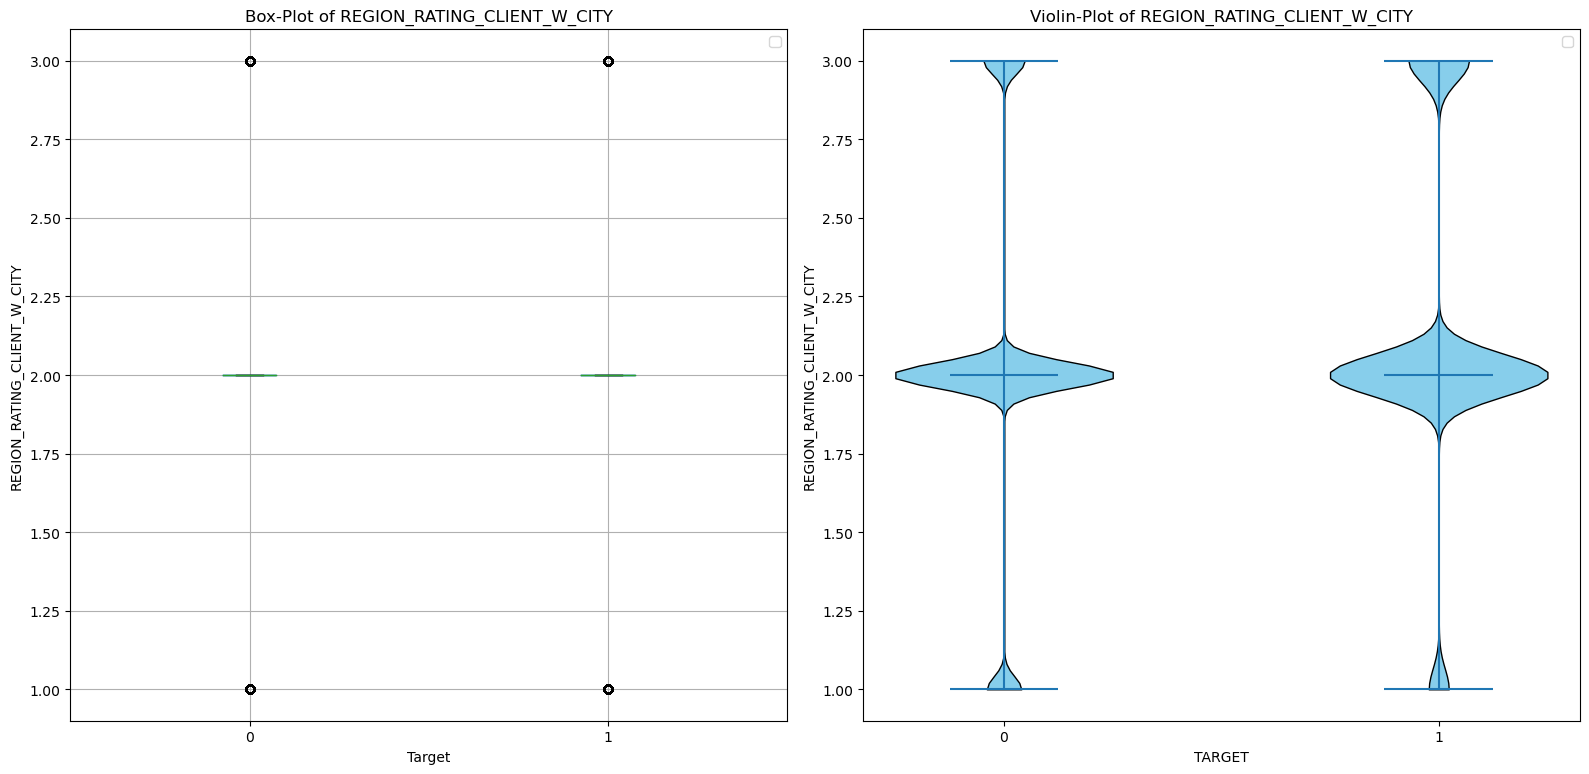

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature REG_CITY_NOT_WORK_CITY: 0.0------
----------------------------------------------------------------------------------------------------
------The percentile for the feature REG_CITY_NOT_WORK_CITY------
The 0th percentile value of REG_CITY_NOT_WORK_CITY is 0.0
The 25th percentile value of REG_CITY_NOT_WORK_CITY is 0.0
The 50th percentile value of REG_CITY_NOT_WORK_CITY is 0.0
The 75th percentile value of REG_CITY_NOT_WORK_CITY is 0.0
The 90th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
The 92th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
The 94th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
The 96th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
The 98th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
The 100th percentile value of REG_CITY_NOT_WORK_CITY is 1.0
------------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


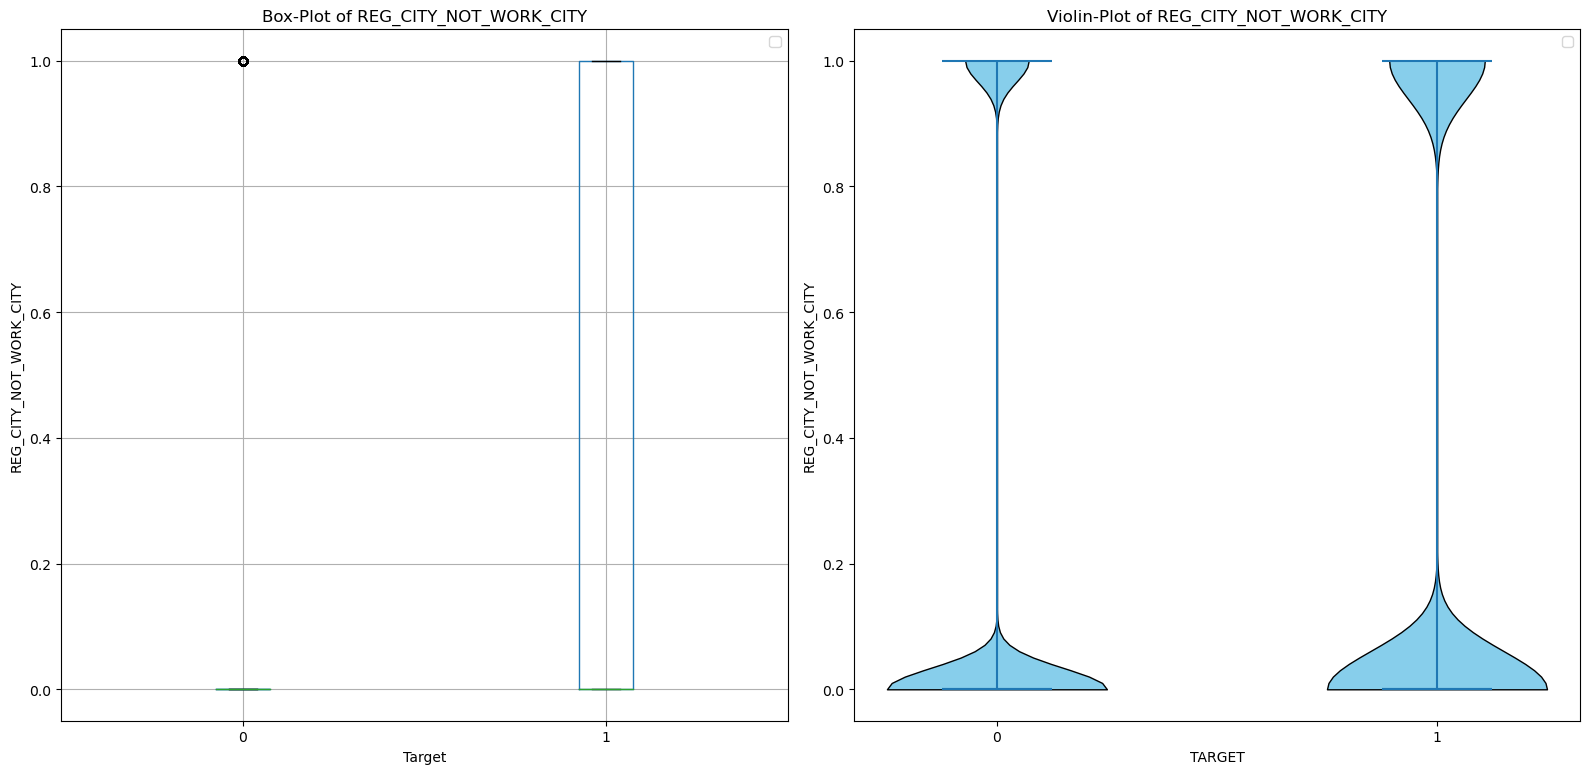

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature EXT_SOURCE_2: 0.0021462646864665006------
----------------------------------------------------------------------------------------------------
------The percentile for the feature EXT_SOURCE_2------
The 0th percentile value of EXT_SOURCE_2 is 8.173616518884397e-08
The 25th percentile value of EXT_SOURCE_2 is 0.3924574161782719
The 50th percentile value of EXT_SOURCE_2 is 0.5659614260608526
The 75th percentile value of EXT_SOURCE_2 is 0.6636170897493769
The 90th percentile value of EXT_SOURCE_2 is 0.7220467277920761
The 92th percentile value of EXT_SOURCE_2 is 0.7316195081528535
The 94th percentile value of EXT_SOURCE_2 is 0.7419868754190672
The 96th percentile value of EXT_SOURCE_2 is 0.7541508363025183
The 98th percentile value of EXT_SOURCE_2 is 0.7704857628494224
The 100th percentile value of EXT_SOURCE_2 is 0.8549996664047012
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


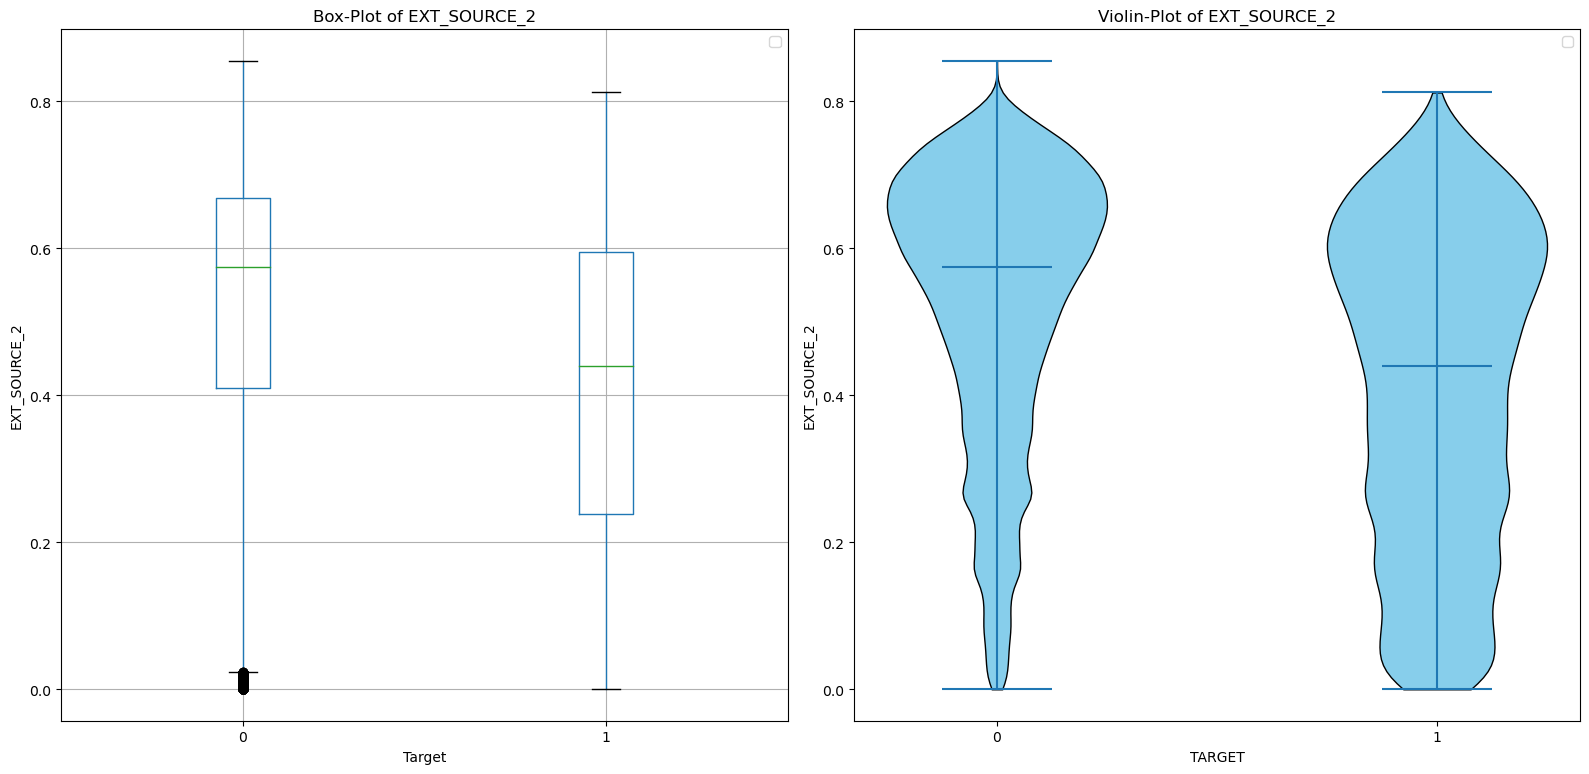

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature EXT_SOURCE_3: 0.19825307062186392------
----------------------------------------------------------------------------------------------------
------The percentile for the feature EXT_SOURCE_3------
The 0th percentile value of EXT_SOURCE_3 is 0.0005272652387098
The 25th percentile value of EXT_SOURCE_3 is 0.3706496323299817
The 50th percentile value of EXT_SOURCE_3 is 0.5352762504724826
The 75th percentile value of EXT_SOURCE_3 is 0.6690566947824041
The 90th percentile value of EXT_SOURCE_3 is 0.7490217048463391
The 92th percentile value of EXT_SOURCE_3 is 0.7662336700704004
The 94th percentile value of EXT_SOURCE_3 is 0.7801436381572275
The 96th percentile value of EXT_SOURCE_3 is 0.7981372313187245
The 98th percentile value of EXT_SOURCE_3 is 0.8193176922872417
The 100th percentile value of EXT_SOURCE_3 is 0.8960095494948396
--------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


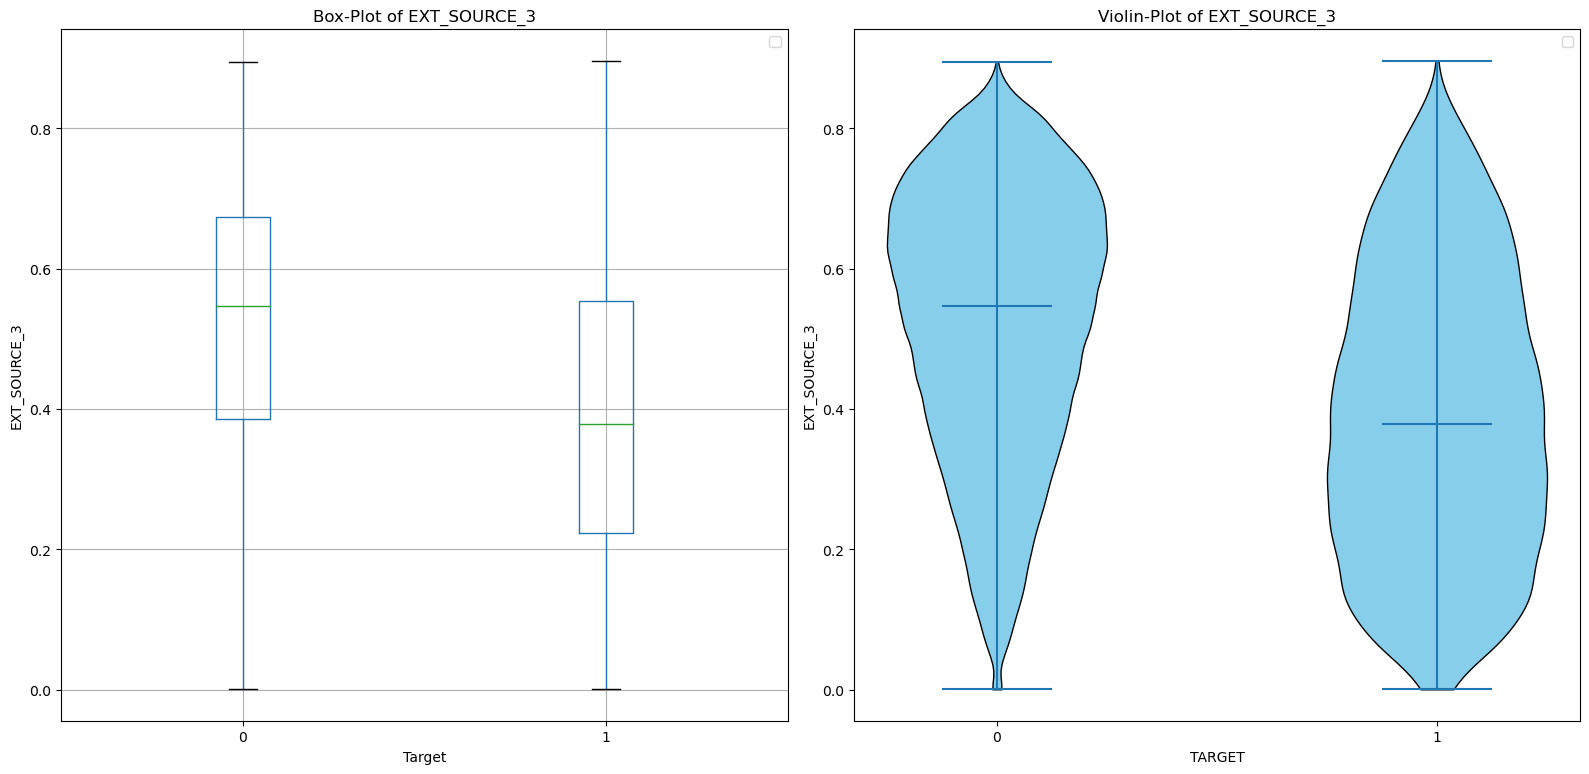

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature FLOORSMAX_AVG: 0.4976082156410665------
----------------------------------------------------------------------------------------------------
------The percentile for the feature FLOORSMAX_AVG------
The 0th percentile value of FLOORSMAX_AVG is 0.0
The 25th percentile value of FLOORSMAX_AVG is 0.1667
The 50th percentile value of FLOORSMAX_AVG is 0.1667
The 75th percentile value of FLOORSMAX_AVG is 0.3333
The 90th percentile value of FLOORSMAX_AVG is 0.375
The 92th percentile value of FLOORSMAX_AVG is 0.375
The 94th percentile value of FLOORSMAX_AVG is 0.4583
The 96th percentile value of FLOORSMAX_AVG is 0.5417
The 98th percentile value of FLOORSMAX_AVG is 0.625
The 100th percentile value of FLOORSMAX_AVG is 1.0
----------------------------------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


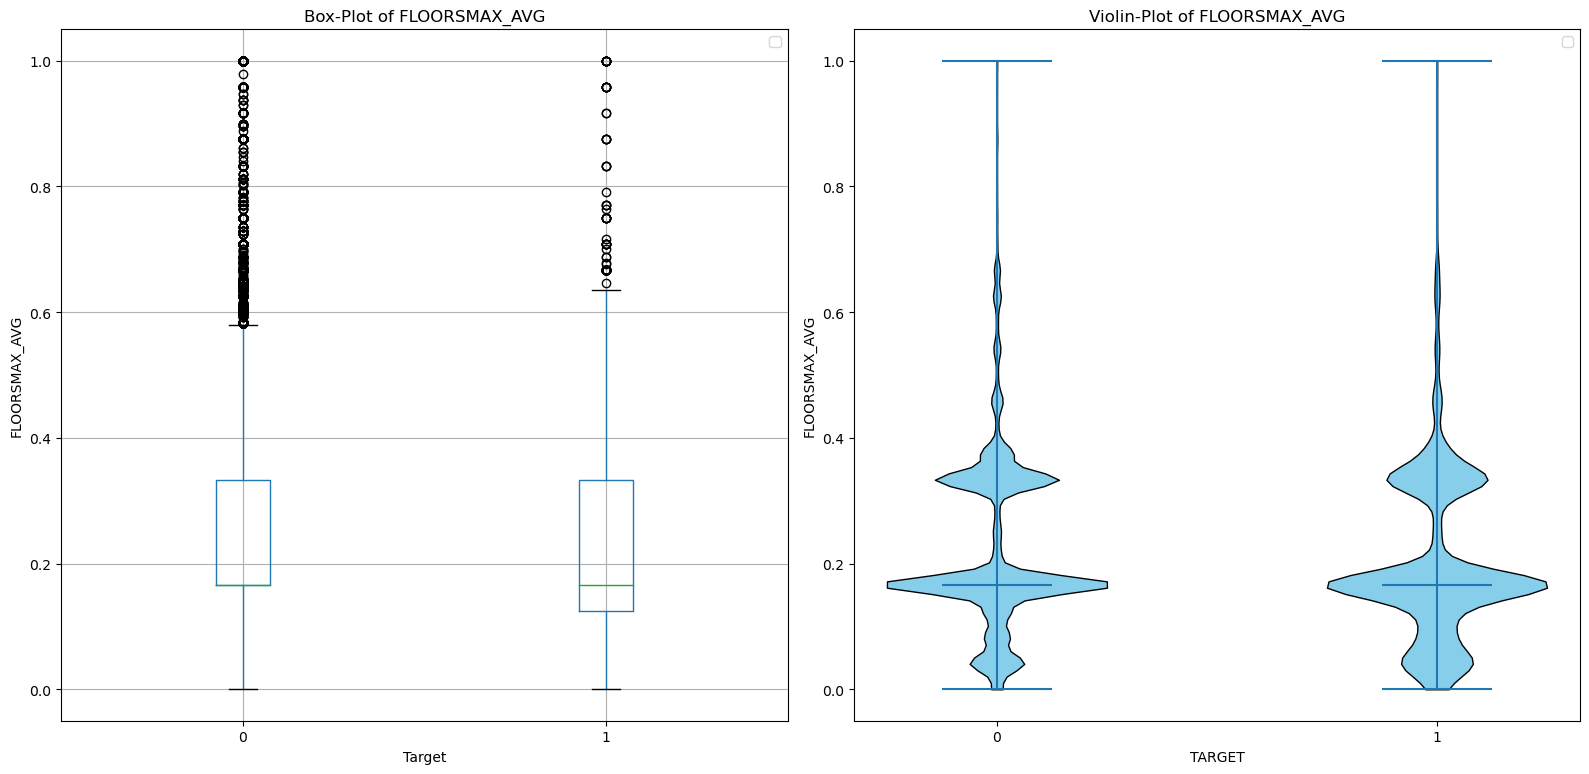

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature TOTALAREA_MODE: 0.4826851722377411------
----------------------------------------------------------------------------------------------------
------The percentile for the feature TOTALAREA_MODE------
The 0th percentile value of TOTALAREA_MODE is 0.0
The 25th percentile value of TOTALAREA_MODE is 0.0412
The 50th percentile value of TOTALAREA_MODE is 0.0688
The 75th percentile value of TOTALAREA_MODE is 0.1276
The 90th percentile value of TOTALAREA_MODE is 0.2273
The 92th percentile value of TOTALAREA_MODE is 0.2518
The 94th percentile value of TOTALAREA_MODE is 0.286
The 96th percentile value of TOTALAREA_MODE is 0.3361
The 98th percentile value of TOTALAREA_MODE is 0.4305
The 100th percentile value of TOTALAREA_MODE is 1.0
----------------------------------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


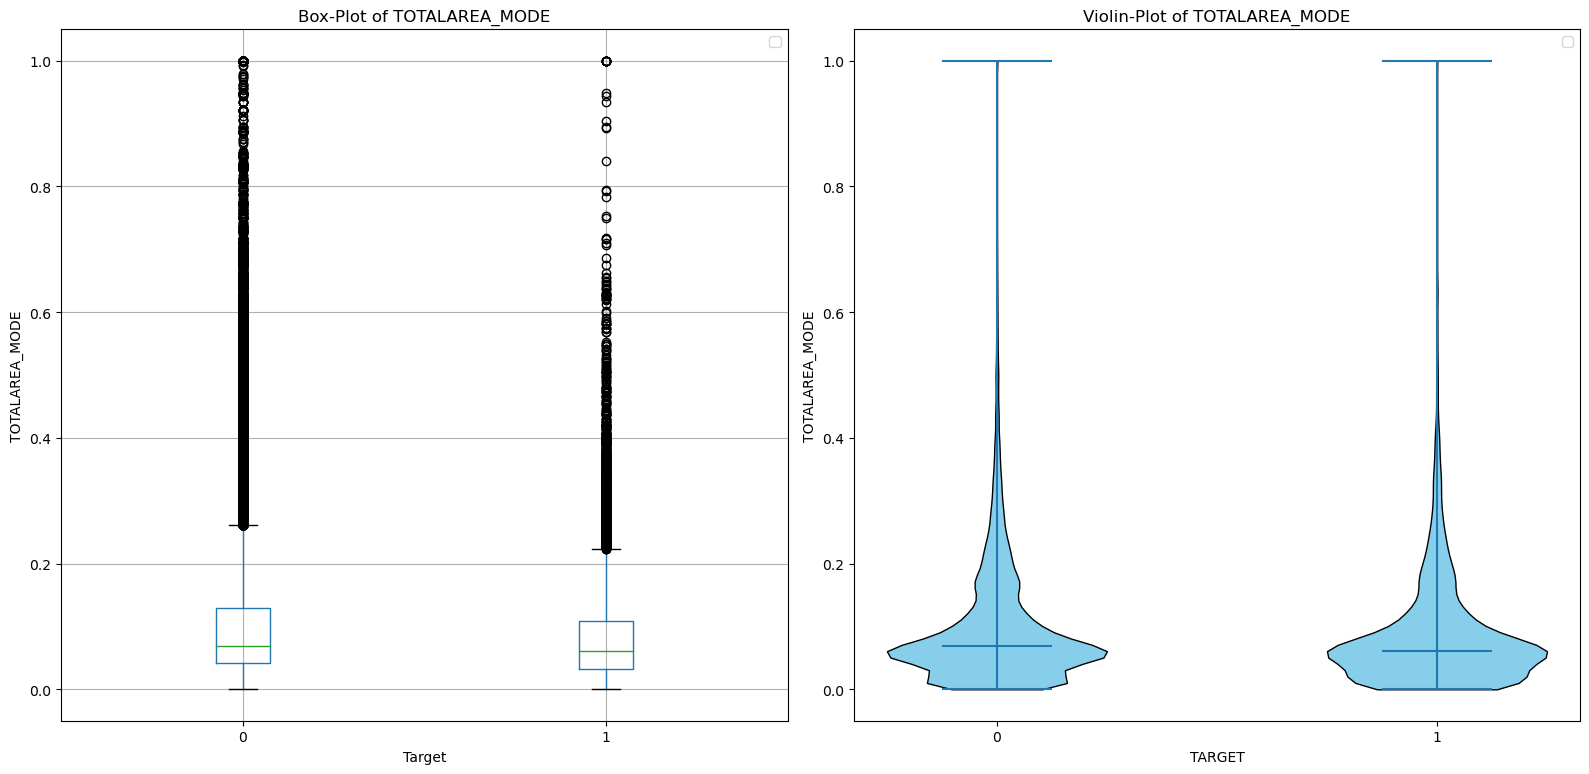

----------------------------------------------------------------------------------------------------
------The percentage of missing value for the feature DAYS_LAST_PHONE_CHANGE: 3.2519161916159095e-06------
----------------------------------------------------------------------------------------------------
------The percentile for the feature DAYS_LAST_PHONE_CHANGE------
The 0th percentile value of DAYS_LAST_PHONE_CHANGE is -4292.0
The 25th percentile value of DAYS_LAST_PHONE_CHANGE is -1570.0
The 50th percentile value of DAYS_LAST_PHONE_CHANGE is -757.0
The 75th percentile value of DAYS_LAST_PHONE_CHANGE is -274.0
The 90th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
The 92th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
The 94th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
The 96th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
The 98th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
The 100th percentile value of DAYS_LAST_PHONE_CHANGE is 0.0
---------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


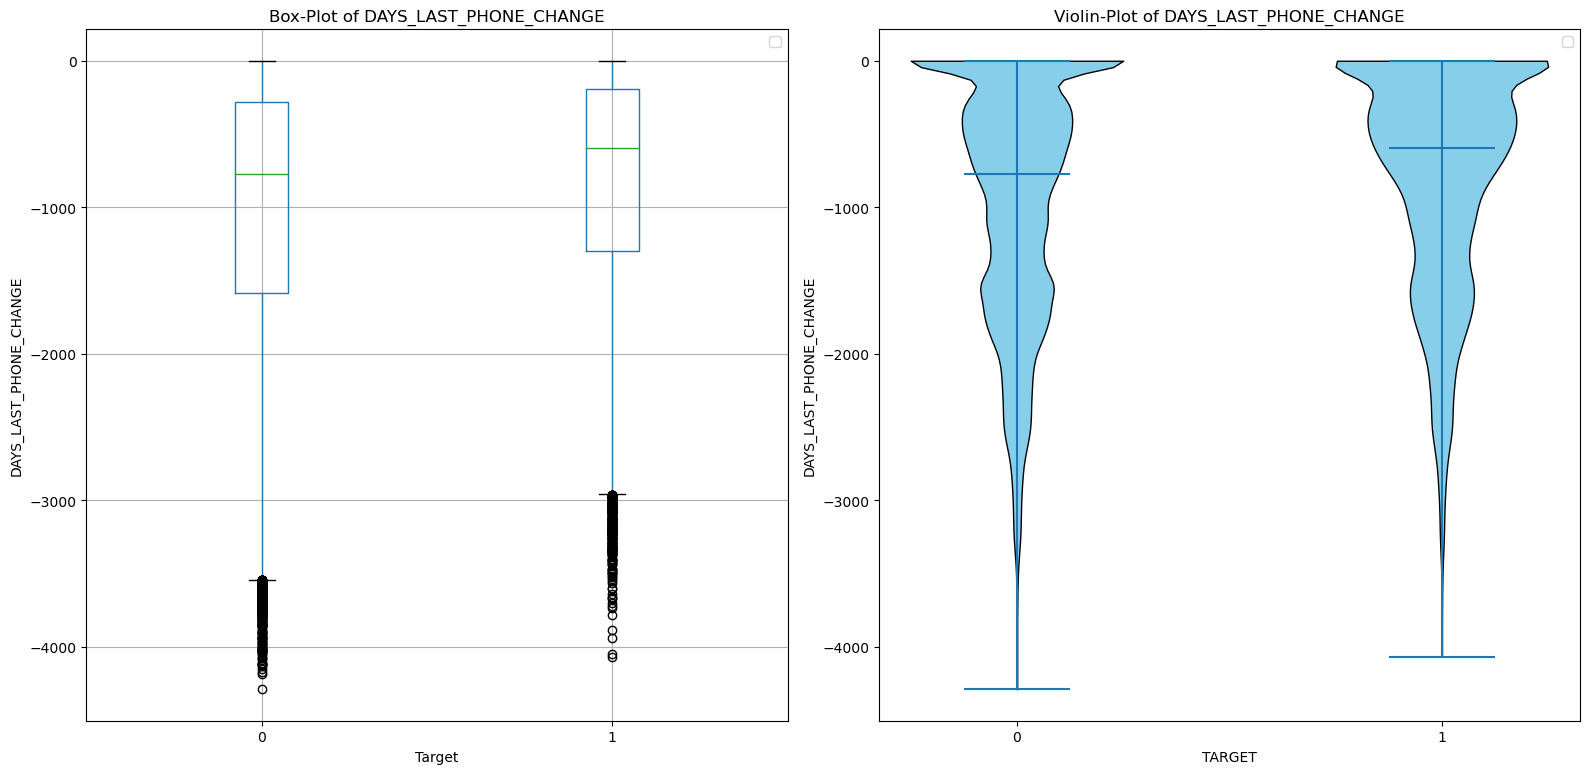

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_continuous_variables(data, column_name, target_column_name, plots=['distplot', 'CDF', 'box'], scale_limits=None, figsize=(20, 8), histogram=True, log_scale=False, percentiles =None):
    '''
    Function to plot continuous variables distribution using matplotlib

    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        target_column_name: str
            Column's name of the target variable.
        plots: list, default = ['distplot', 'CDF', 'box']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20, 8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''
    print('-'*100)
    nan_percentage = data[column_name].isnull().mean()
    print(f"------The percentage of missing value for the feature {column_name}: {nan_percentage}------")
    print('-'*100)
    print(f"------The percentile for the feature {column_name}------")
    if not percentiles:
        percentiles = list(range(0,80,25)) + list(range(90,101,2))
    for i in percentiles:
        print(f'The {i}th percentile value of {column_name} is {np.percentile(data[column_name].dropna(), i)}')
    print("-"*100)

    data_to_plot = data.copy()
    if scale_limits:
        data_to_plot = data_to_plot[(data_to_plot[column_name] > scale_limits[0]) & (data_to_plot[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)

    for i, plot_type in enumerate(plots):
        ax = plt.subplot(1, number_of_subplots, i + 1)

        if plot_type == 'CDF':
            for target_value in data_to_plot[target_column_name].unique():
                subset = data_to_plot[data_to_plot[target_column_name] == target_value][column_name].dropna()
                sorted_data = np.sort(subset)
                yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
                ax.plot(sorted_data, yvals, label=f'Target {target_value}')
            ax.set_xlabel(column_name)
            ax.set_ylabel('Probability')
            ax.set_title('CDF of {}'.format(column_name))
            if log_scale:
                ax.set_xscale('log')
                ax.set_xlabel(column_name + ' - (log-scale)')

        elif plot_type == 'distplot':
            # Set up the colors for the plot. You can choose any color scheme.
            colors = {0: 'red', 1: 'black'}  # Assuming binary target with values 0 and 1

            # Calculate the KDE for each target value and plot
            for target_value in sorted(data_to_plot[target_column_name].unique()):
                subset = data_to_plot[data_to_plot[target_column_name] == target_value][column_name].dropna()
                kde = gaussian_kde(subset)
                x_range = np.linspace(subset.min(), subset.max(), 1000)
                ax.plot(x_range, kde(x_range), label=f'{"Non-Defaulters" if target_value == 0 else "Defaulters"}', color=colors[target_value])

            ax.set_xlabel(column_name)
            ax.set_ylabel('Probability Density')
            ax.set_title(f'Dist-Plot of {column_name}')
            if log_scale:
                ax.set_xscale('log')
                ax.set_xlabel(column_name + ' (log scale)')

            ax.legend()

        elif plot_type == 'box':
            data_to_plot.boxplot(column=column_name, by=target_column_name, ax=ax)
            ax.set_title("Box-Plot of {}".format(column_name))
            ax.set_xlabel('Target')
            ax.set_ylabel(column_name)
            plt.suptitle("")  # Suppress the default title to only show custom title
            if log_scale:
                ax.set_yscale('log')
                ax.set_ylabel(column_name + ' (log Scale)')
        elif plot_type == 'violin':
            # Get unique categories
            categories = data_to_plot[target_column_name].unique()
            categories.sort()

            # Prepare the data for each category
            data_to_violin = [data_to_plot[data_to_plot[target_column_name] == category][column_name].dropna().values for category in categories]

            # Create the violin plot
            parts = ax.violinplot(data_to_violin, showmeans=False, showmedians=True)

            # Coloring each violin
            for pc in parts['bodies']:
                pc.set_facecolor('skyblue')
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            # Setting the y-axis to log scale if specified
            if log_scale:
                ax.set_yscale('log')

            # Adding title and labels
            ax.set_title("Violin-Plot of {}".format(column_name))
            ax.set_xlabel('TARGET')
            ax.set_ylabel(column_name)

            # Adding x-tick labels
            ax.set_xticks(np.arange(1, len(categories) + 1))
            ax.set_xticklabels(categories)

            # Adjusting y-axis label if log scale
            if log_scale:
                ax.set_ylabel(f'{column_name} (log Scale)')
        ax.legend()
        plt.tight_layout()
        

    plt.show()
for columns in result[select_var].columns:
    try:
        plot_continuous_variables(result, columns,target_column_name = 'TARGET', plots = ['box', 'violin'], figsize = (16,8))
    except:
        pass


Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


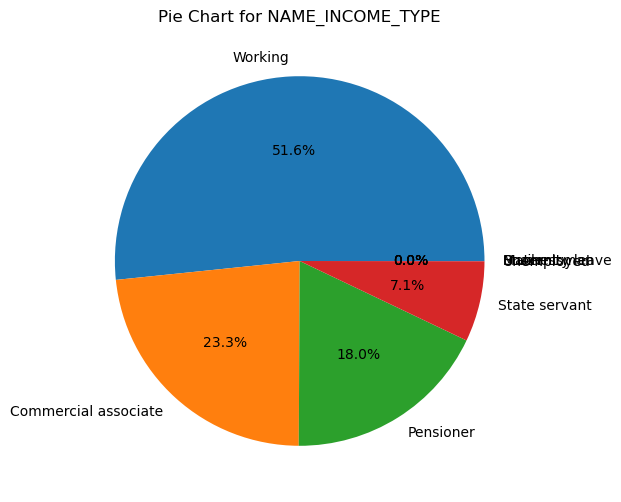

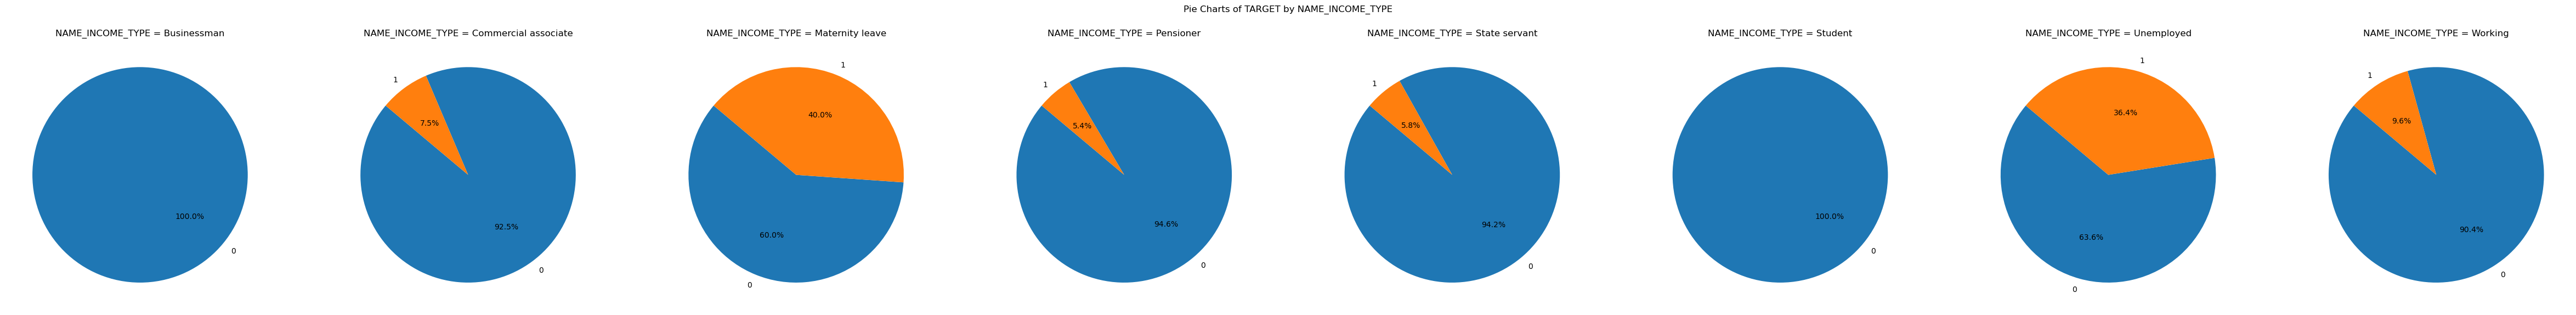

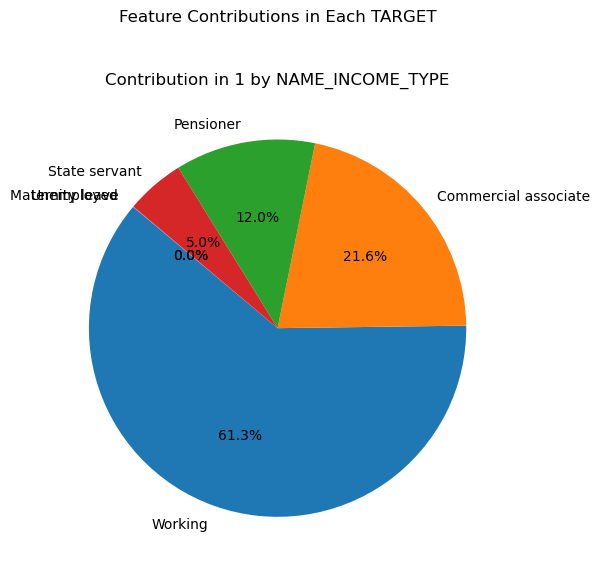

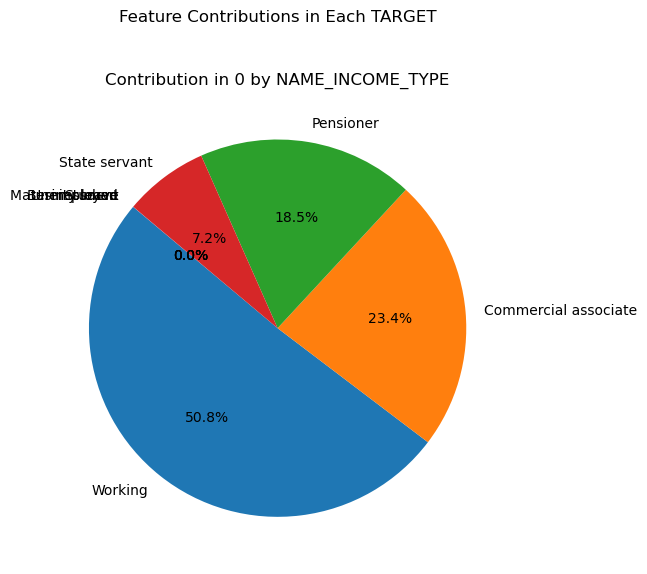

Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


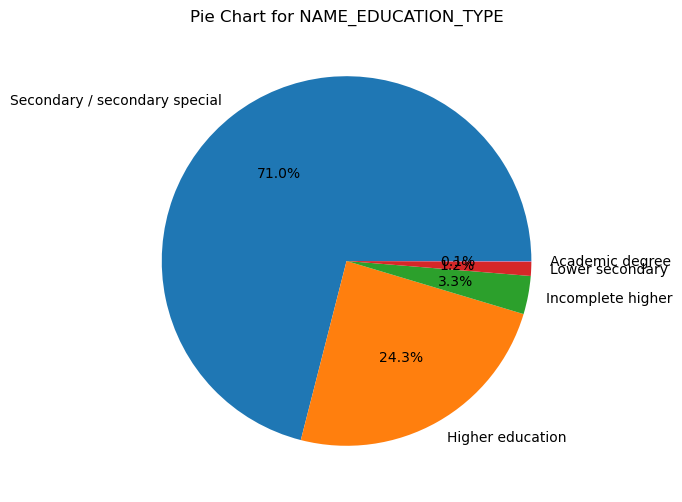

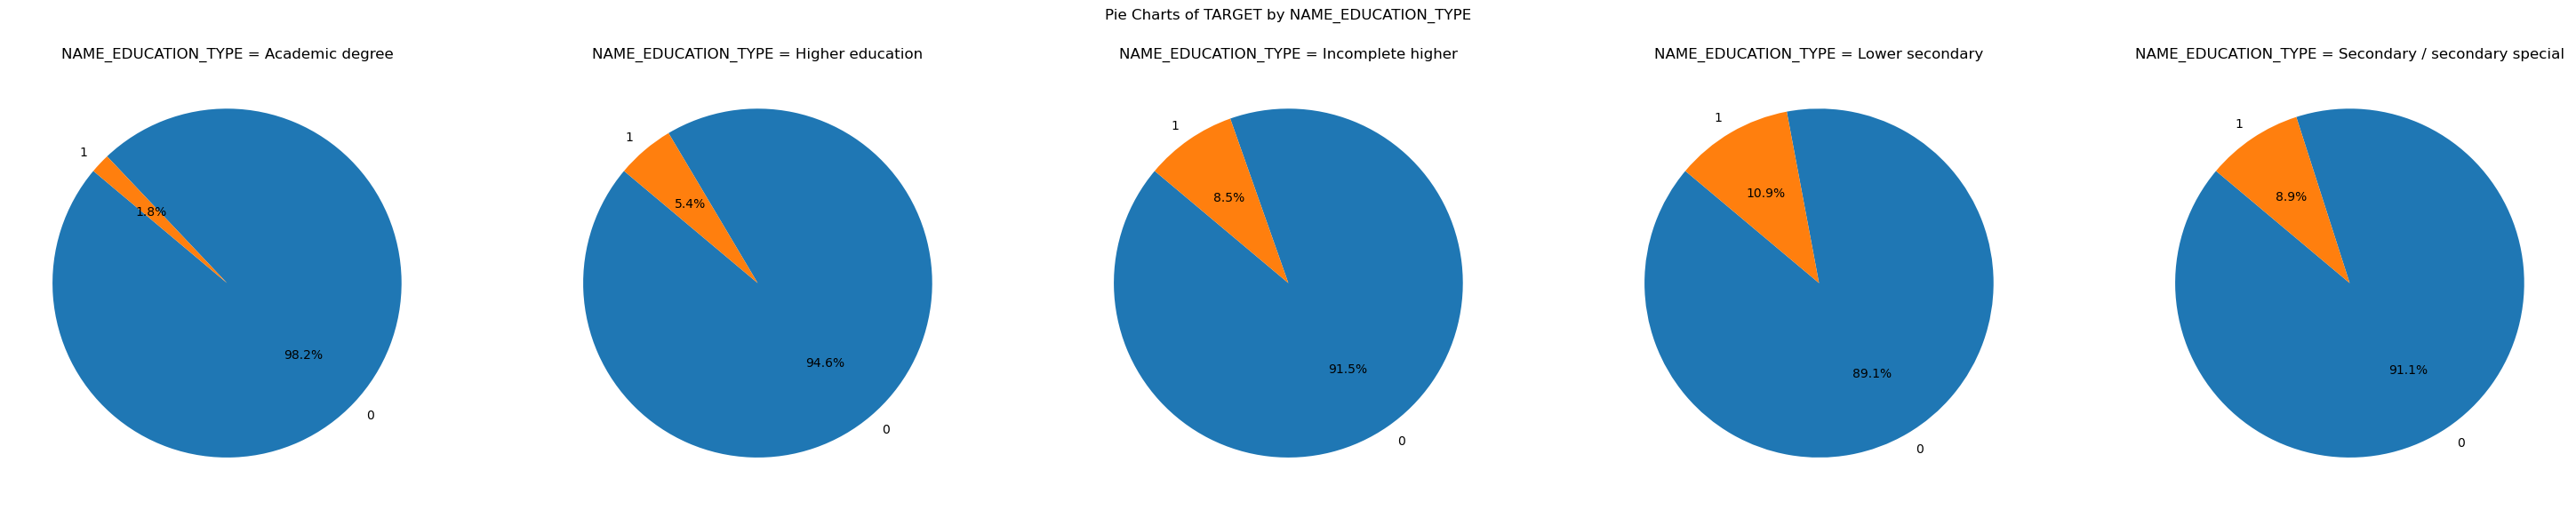

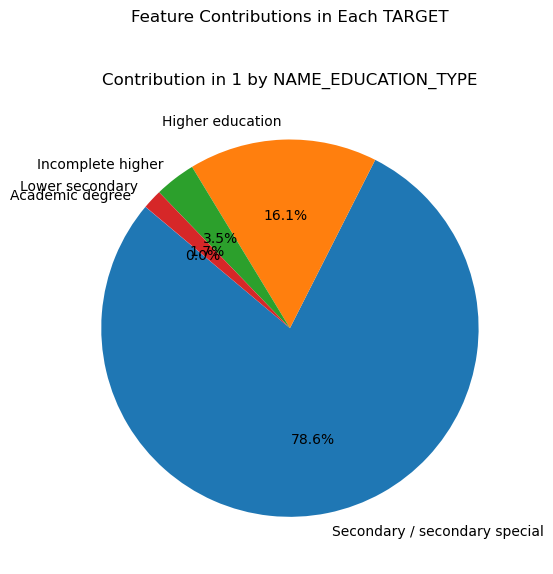

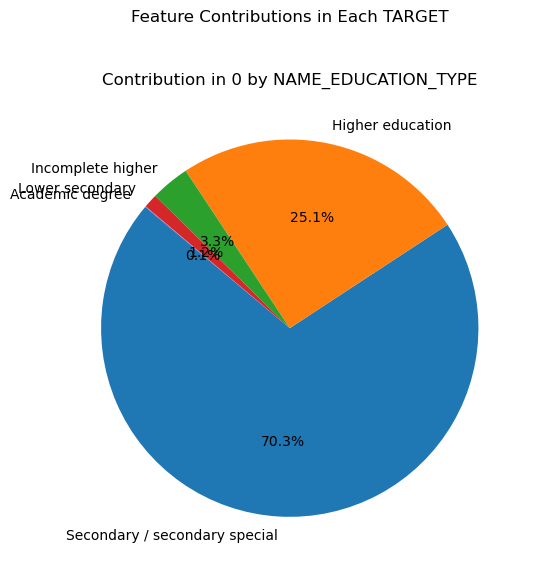

Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


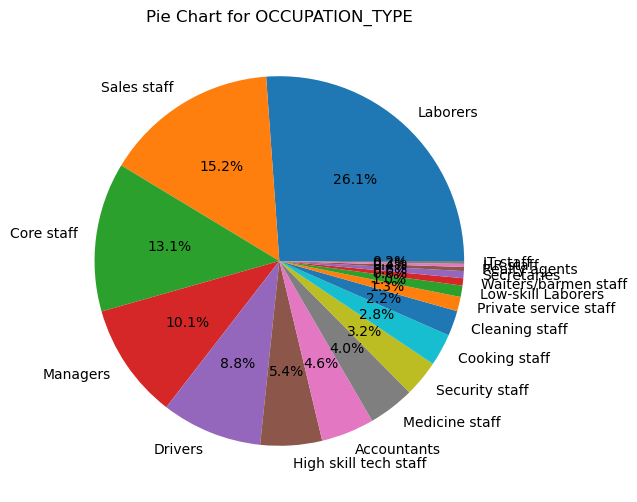

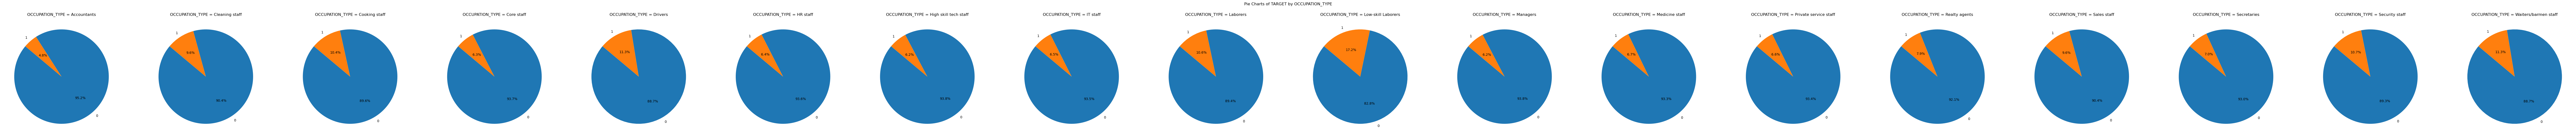

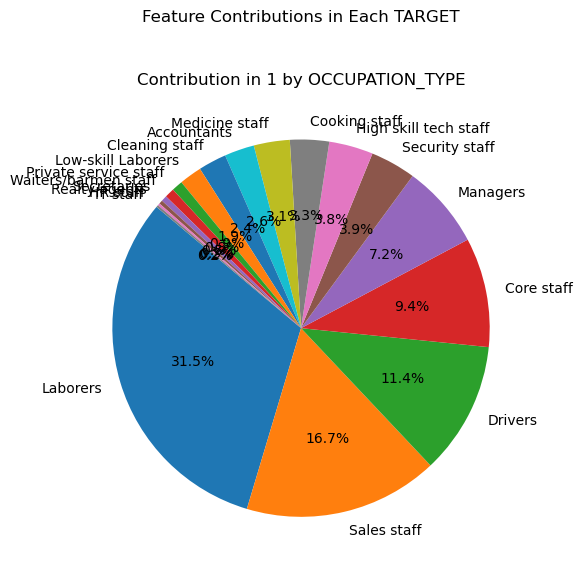

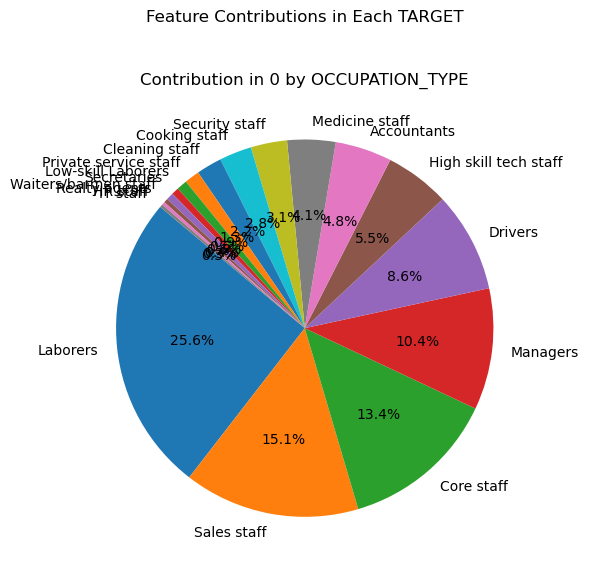

Unique values in ORGANIZATION_TYPE: ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']


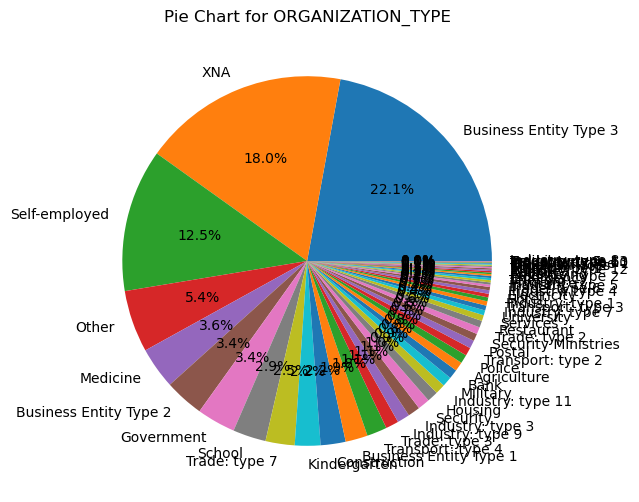

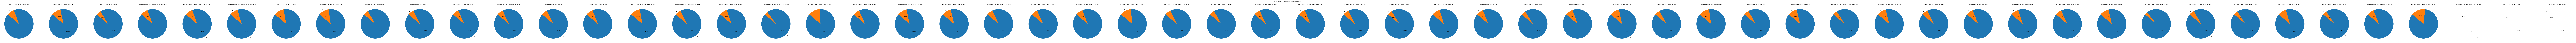

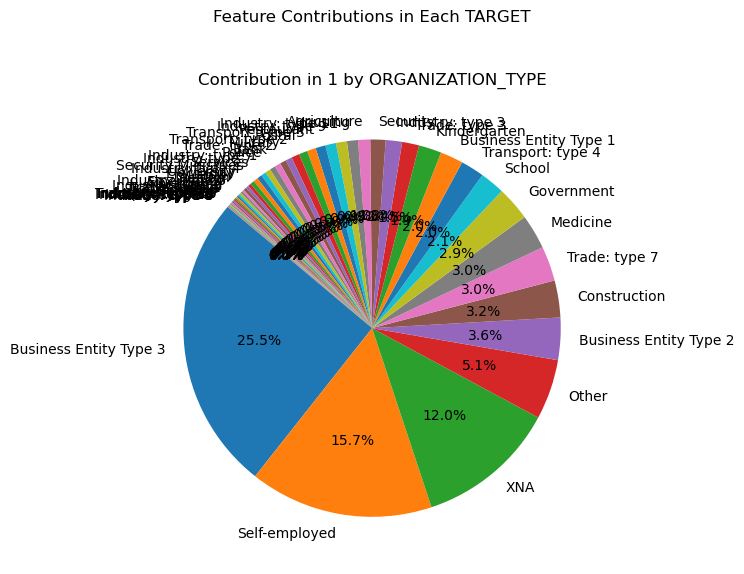

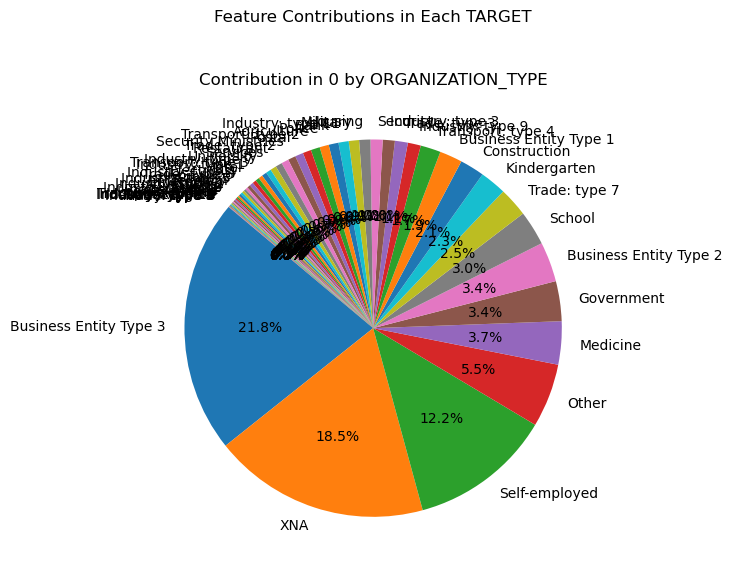

In [ ]:
class DataFrameAnalyzer:
    def __init__(self, df, columns):
        self.df = df
        self.columns = columns

    def print_unique_values(self):
        for column in self.columns:
            print(f"Unique values in {column}: {self.df[column].unique()}")

    def plot_pie_charts(self):
        for column in self.columns:
            counts = self.df[column].value_counts()
            plt.figure(figsize=(6, 6))
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
            plt.title(f"Pie Chart for {column}")
            plt.show()

    def plot_grouped_pie_charts(self, target_column):
        for column in self.columns:
            grouped = self.df.groupby(column)[target_column].value_counts(normalize=True)
            num_groups = len(grouped.groupby(level=0))
            plt.figure(figsize=(num_groups * 6, 6))  # Adjust figure size dynamically
            for j, (group, values) in enumerate(grouped.groupby(level=0), start=1):
                plt.subplot(1, num_groups, j)
                plt.pie(values, labels=values.index.get_level_values(1), autopct='%1.1f%%', startangle=140)
                plt.title(f'{column} = {group}')
            plt.suptitle(f'Pie Charts of {target_column} by {column}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
    def plot_target_contribution_pie_charts(self, target_column):
        for unique_value in self.df[target_column].unique():
            plt.figure(figsize=(12, 6))
            for i, column in enumerate(self.columns, start=1):
                counts = self.df[self.df[target_column] == unique_value][column].value_counts()                                                                  
                plt.subplot(1, len(self.columns), i)
                plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
                plt.title(f'Contribution in {unique_value} by {column}')
            plt.suptitle(f'Feature Contributions in Each {target_column}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
    def plot_continuous_feature_distribution(self, target_column):
        for column in self.columns:
            plt.figure(figsize=(12, 6))
            
            # Dist Plot
            plt.subplot(1, 2, 1)
            sns.histplot(data=self.df, x=column, kde=True)
            plt.title(f'Distribution of {column}')
            
            # Box Plot
            plt.subplot(1, 2, 2)
            sns.boxplot(data=self.df, x=target_column, y=column)
            plt.title(f'Box Plot of {column} by {target_column}')
            
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
for column in result[char_df].columns:
    analyzer = DataFrameAnalyzer(result, [column])
    analyzer.print_unique_values()
    analyzer.plot_pie_charts()
    analyzer.plot_grouped_pie_charts('TARGET')
    analyzer.plot_target_contribution_pie_charts('TARGET')

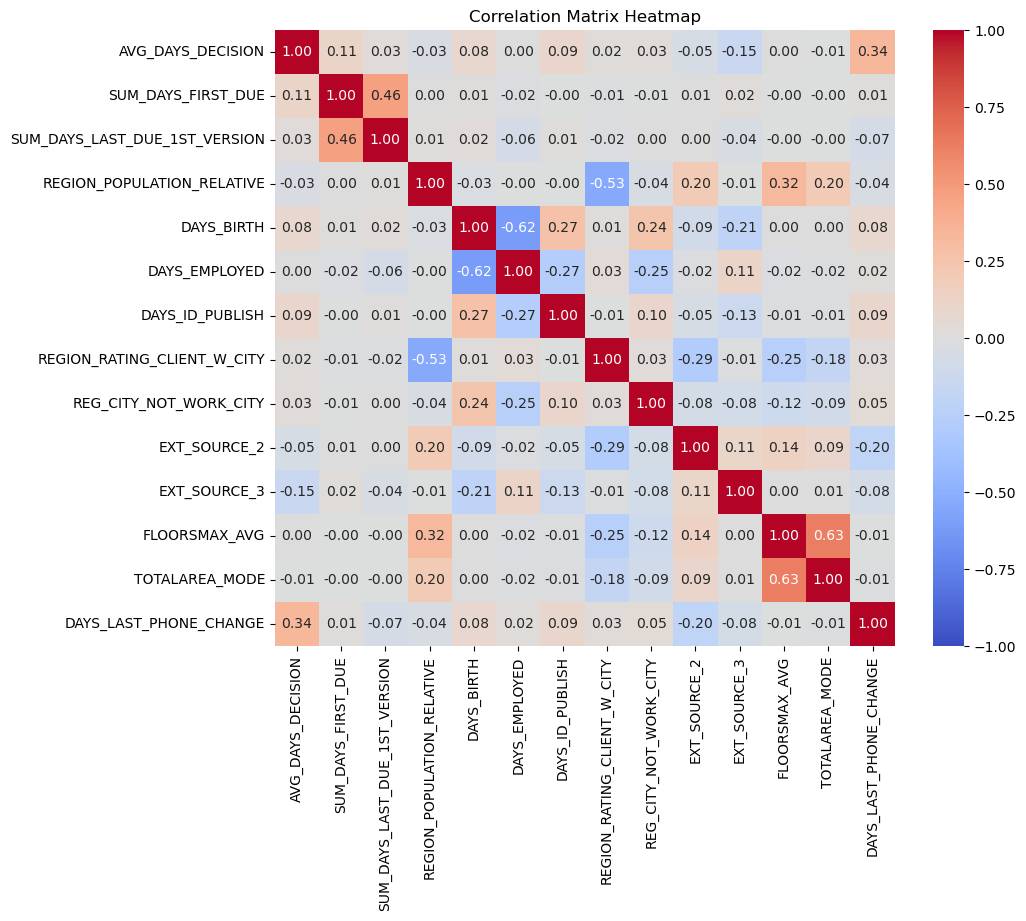

In [ ]:
# Calculate the correlation matrix
corr = result[select_var].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

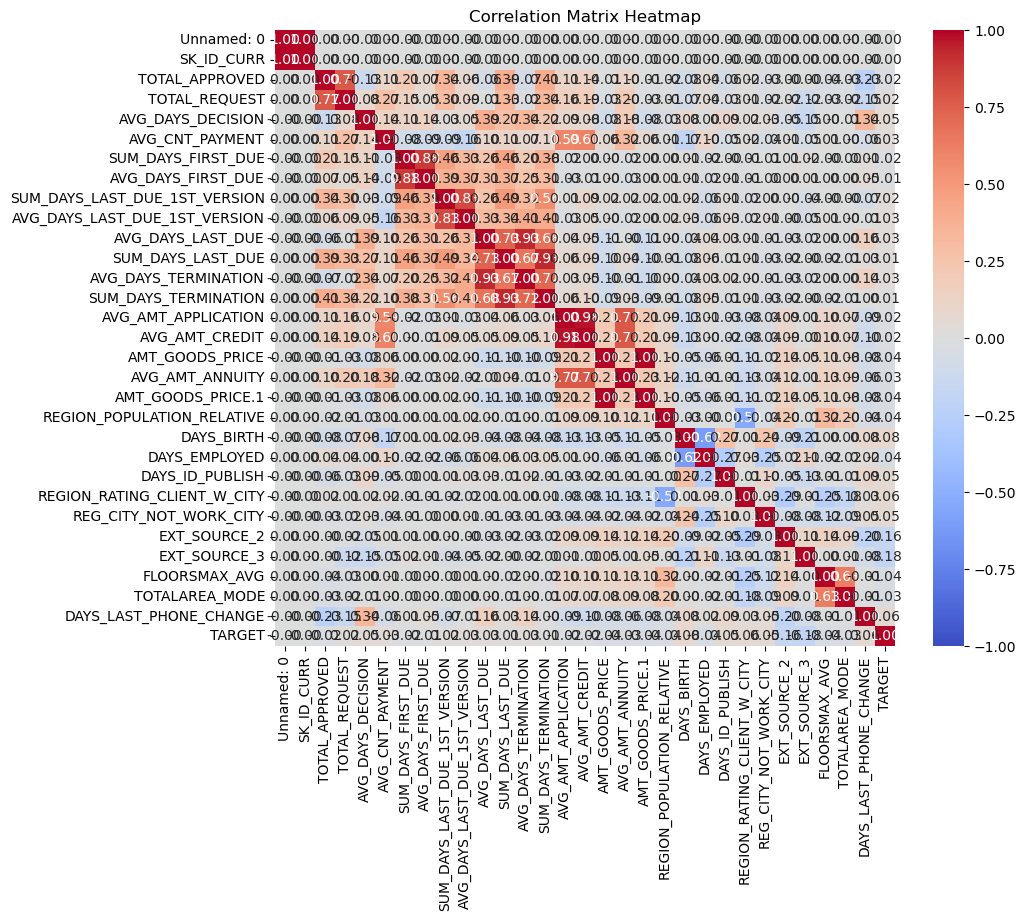

In [ ]:
numberic_columns = result.select_dtypes(include='number').columns.tolist()
corr = result[numberic_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()